# Business Problem:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most. 

Our main task is to cluster the countries by the factors mentioned above and then present your solution and recommendations to the CEO using a PPT. 

# Steps

1. Data understanding

   - Import Python libraries
   - Read and inspect data for understanding
   - Summary statistics
   - Analyse the columns


2. Exploratory Data Analysis

  - Null Value Analysis
  - Derive data – convert exports, imports, health from % of GDPP to absolute values
  - Data Visualization
    - Visualising Bivariate Distributions using pair plot
    - Visualising Correlation using heatmap
    - Visualising univariate distributions using Histogram and density plots
    - Visualising GDPP, income, child mortality and other parameters across countries using point plots and bar plots
    - Visualising univariate distributions using boxplots to identify outliers


3. Prepare data for modelling

  - Outlier Treatment
  - Hopkins test
  - Scaling


4. Build model using K-means

   - Metrics to choose the value of K
     - Elbow curve 
     - Silhouette Analysis
     - Iterating with different values of k and choose optimal k as optimal number of clusters
     - Country Segmentation
     - Cluster Profiling based on GDPP, Income and Child Mortality Rate
       - Scatter Plots
       - Box plots
       - Bar plots on the mean of the columns in each cluster
     - Identification of top 10 countries in need of aid.

5. Build model using Hierarchical clustering

  - Single linkage
  - Complete linkage
  
     - Country Segmentation
     - Cluster Profiling based on GDPP, Income and Child Mortality Rate
       - Scatter Plots
       - Box plots
       - Bar plots on the mean of the columns in each cluster
     - Identification of top 10 countries in need of aid.

6. Suggestions 

## 1.1 Import libraries

Ignore warnings and import necessary libraries:

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

# To display data dictionary fully
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 1000)

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.color_palette("Set1")

# To Scale our data
from sklearn.preprocessing import StandardScaler

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## 1.2 Read and inspect data for understanding

Lets read the data dictionary into `data_dictionary` dataframe and understand the columns

In [3]:

data_dictionary = pd.read_csv('data-dictionary.csv')
data_dictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


There are total of `10 columns` in the actual dataset.

From the data dictionary, we can see that `exports`, `health` and `imports` are given as percentage of GDP. Hence we have to convert these columns to absolute values in the EDA section

Lets read the actual dataset into `country_df`

In [4]:
country_df = pd.read_csv('Country-data.csv')
country_df.head() # Checking the top 5 rows of the dataframe

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# checking botton 5 rows of the dataframe
country_df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [111]:
len(country_df['country'].unique())

167

### Data Inspection:

Inspect the various aspects of the `country_df` dataframe such as 
- `shape` for number of rows and columns
- `size` for memory usage
- `info()` for the presence of null values
- `nunique()` for checking how many unique entries present in each column and any column is of categorical in nature.
- `nunique() and duplicated` for duplicates analysis
- `describe()` for statistical information

In [6]:
# Checking the shape of the dataframe
country_df.shape

(167, 10)

There are `167` rows and `10` columns in the given dataset.

In [7]:
# Checking the size of the dataframe
country_df.size

1670

In [8]:
# Inspecting type
print(country_df.dtypes)

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object


In [9]:
# How many types of each data type column exists and total memory usage
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


`info` shows that there are no null values present. Still we will check in EDA section using `isnull()`

Also `info()` shows that apart from `country` column, all the columns are numerical and continuous in nature.

### Duplicates analysis

In [10]:
country_df.duplicated().sum()

0

In [11]:
# Checking the number of unique values each column possess to identify categorical columns
country_df.nunique().sort_values()

life_expec    127
total_fer     138
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
gdpp          157
country       167
dtype: int64

`nunique()` shows that there are no categorical variables in the dataframe and all variables are numerical continuous variables.

Also there are `167` rows and `country` has `167` unique values which means the column **country** is unique in each row and hence there are no duplicate records

### Statistical summary

In [12]:
# Checking the numerical columns data distribution
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Summary statistics from `describe()` indicates the presence of outliers. We can visualize the distribution and percentile of each column in Section 2.3 using boxplots

# 2. Exploratory Data Analysis (EDA)
## 2.1 Null Values Analysis

In [13]:
# Looking for any null value in any column 
print(country_df.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


Both `info()` and `isnull()` output indicate that there are no null values in the given dataset.

## 2.2 Derived Data

From the data dictionary in section 1, we saw that exports, health and imports are given as percentage of GDP. Hence we have to convert these columns to absolute values as clustering uses `Euclidean Distance` between values to group the countries

In [14]:
country_df.head() # Lets check data before conversion

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [15]:
# Converting exports,imports and health spending percentages to absolute values.

country_df['exports'] = country_df['exports'] * country_df['gdpp']/100
country_df['imports'] = country_df['imports'] * country_df['gdpp']/100
country_df['health'] = country_df['health'] * country_df['gdpp']/100

country_df.head() # Lets check data after conversion

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


Now all the columns have absolute values and we can visualize the data for more understanding

## 2.3 Visualizing the dataset

Lets start with bi-variate analysis as all are numerical variables and lets see the relationship between each feature.

Also analysing univariate and outlier analysis can be helpful to treat the outliers.

Lets first get the list of numerical columns. As we have seen above, `info()` shows that all columns except `country` are numerical in nature

In [16]:
numerical_cols = list(country_df.columns) # Get all column names
numerical_cols.remove('country') # Remove country as its not numerical
numerical_cols

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

## 2.3.1 Visualising Bivariate Distributions using pairplot

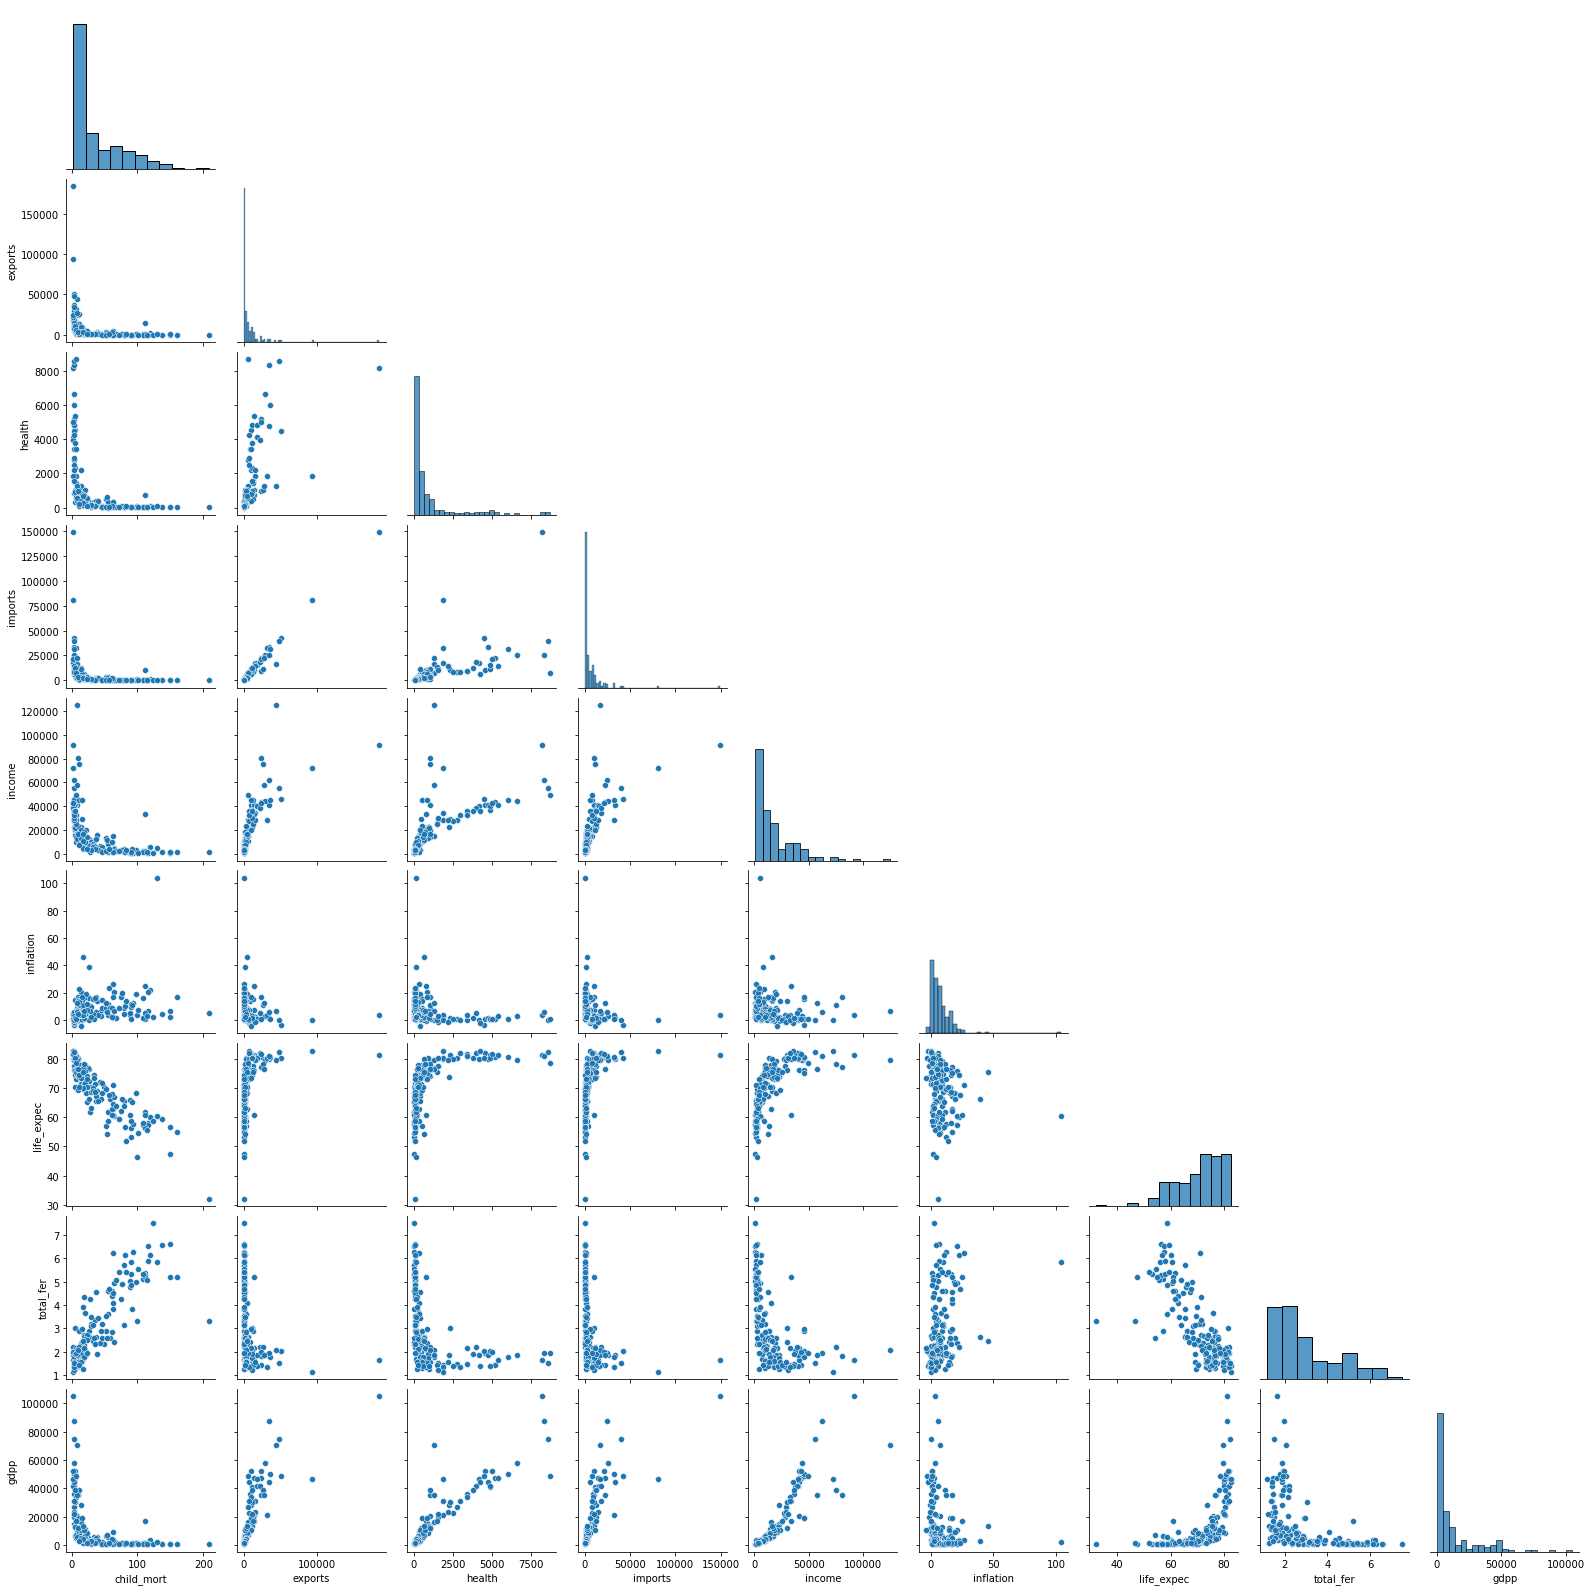

In [17]:
sns.pairplot(country_df[numerical_cols], corner=True)
plt.show()

### Inference

The diagonals of the pairplot gives us the distribution of the column's data and the other plots give the pairwise-relationship.

Initial look at the histograms across the columns give us following picture:
- All the columns have values in different range
e.g total_fer has 0 to 10; child_mort has -50 to 250; gdpp, income, exports, imports have values in thousands.
Hence we need to scale the data.

Some patterns we could see are

- `child_mort` and `total_fer` are directly proportional.
- `child_mort` seems to be high where `health` spending is low  and `inflation` is high
- When `health` spending is more, `life_expect` is high.
- `gdpp` increases as `exports`, `imports`, `income` increase.


## 2.3.2 Visualising Correlation using heatmap

Lets check correlation between different features using heatmap. Both strong positive and negative correlation are shown in darker shades(green and red respectively). The lighter shades indicate the weak or mild correlation:

<AxesSubplot:>

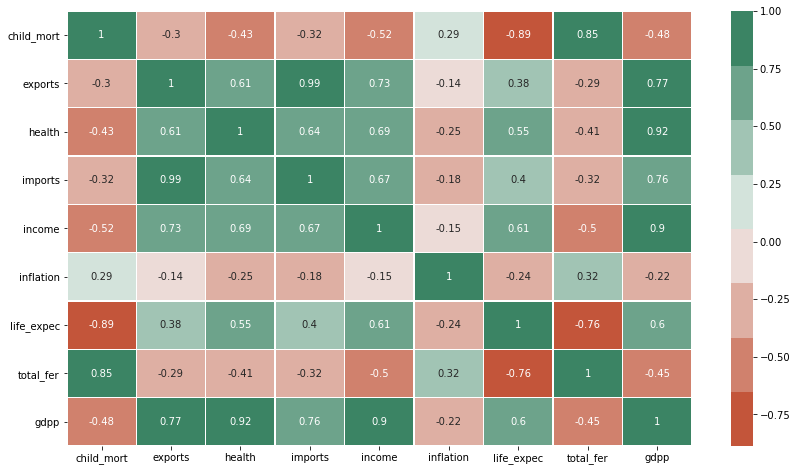

In [18]:
plt.figure(figsize=(14,8))
sns.heatmap(country_df.corr(), annot=True,linewidth = 0.5, cmap = sns.diverging_palette(380, 150, n=8))

### Inferences:
- imports and exports are highly correlated with correlation of 0.99
- health and gdpp are highly correlated with correlation of 0.92
- income and gdpp are highly correlated with correlation of 0.9
- child_mortality and life_expentency are highly and inversely correlated with correlation of -0.89
- child_mortality and total_fertility are highly correlated with correlation of 0.85
life_expentency and total_fertility are highly correlated with correlation of -0.76
- gdpp and exports are highly correlated with correlation of 0.77
- gdpp and imports are highly correlated with correlation of 0.76

## 2.3.3 Visualising univariate distributions using Histogram and density plots


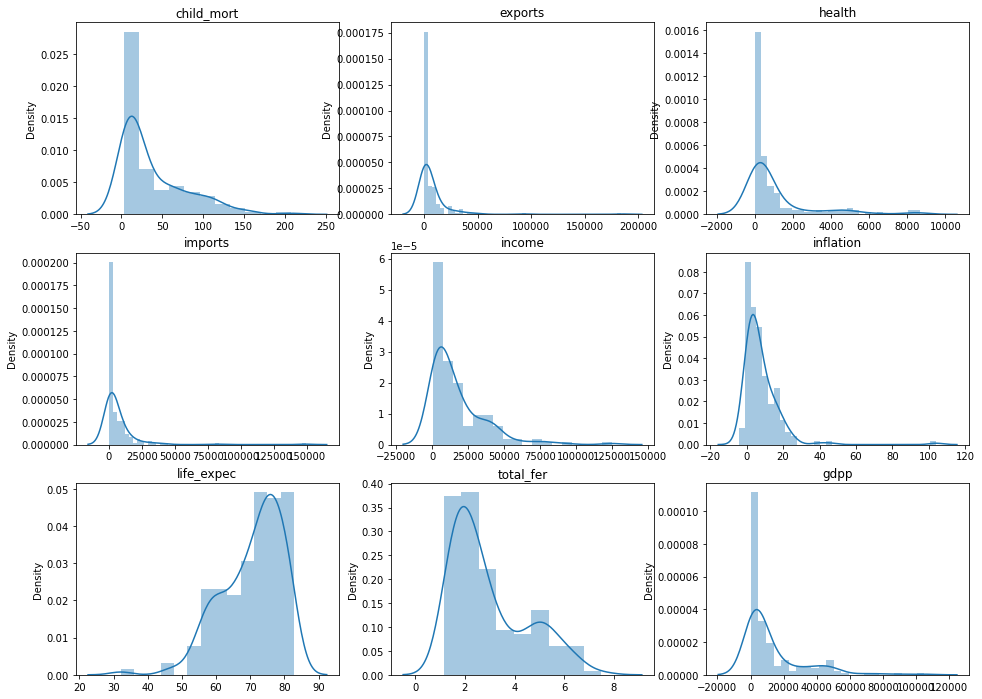

In [19]:
plt.figure(figsize=[16,12])
i=1 # to track the ith plot in the subplot
for col in numerical_cols:
    plt.subplot(3,3,i)
    sns.distplot(country_df[col])
    plt.title(col)
    plt.xlabel('')    
    i+=1

### Inference:

None of the columns have even distribution and further analysis of the columns show presence of outliers as below:

- `child_mort`is right skewed and it indicates that there are countries which have higher values of child mortality and majority of values lie between 0 and 50

- `exports`, `imports`, `health` have huge number of outliers and it is right skewed

- `income` has slight outliers with majority of countries having per person income as between 0 and 25000

- `inflation` has some higher outliers and is right skewed.

- `life_expec` has some lower outliers and is left skewed.

- `gdpp` is right skewed and indicate few countries are doing good and their GDP is pretty high and do not need any aid.

However, we will perform K-means and Hierarchical clustering to perfectly identify the clusters and the countries which are in need of aid.

## 2.3.4 Visualising univariate distributions across countries using point plots and barplots:

We will plot `gdpp`, `income`, `child_mort` of all countries and see how the data is distributed. Since pointplot plots the mean of categorical variables and each row is unique, point plots can be used here to show the distribution of the data and their range compared with other countries.

The following is a generic function to create point plots and draw a line to indicate the countries that might need help:

In [20]:
def point_plots_with_line(y_column, line_cutoff, ylog=False):
    #plt.figure(figsize=(18,6))
    ax = sns.pointplot(x="country", y=y_column, data=country_df)
    plt.xticks(rotation = 90,fontsize =7)
    if ylog:
        plt.yscale('log')
    ax.axhline(line_cutoff, ls='--',color='red')
    plt.title("%s vs countries" %y_column)
    plt.ylabel(y_column)
    plt.xlabel('')
    #plt.show()

In [21]:
def plot_bottom10_countries(y_column, sort_order=True, truncate_string=False):
    sorted_df = country_df[['country',y_column]].sort_values(y_column, ascending = sort_order).head(10) # get bottom 10
    sorted_df[y_column] = sorted_df[y_column].round(2) # roundoff to 2 decimals
    if truncate_string: # truncate only for subplots proper visualization purpose
        sorted_df.loc[sorted_df['country'].str.contains('Central African Republic'),'country'] = 'Cent.Afr.Repub.'
        sorted_df.loc[sorted_df['country'].str.contains('Congo'),'country'] = 'Congo'
        sorted_df.loc[sorted_df['country'].str.contains('Equatorial Guinea'),'country'] = 'Guinea'
        
    ax = sns.barplot(x='country', y=y_column, data= sorted_df)
    for each_bar in ax.patches:
        ax.annotate(str(each_bar.get_height()), (each_bar.get_x() * 1.01 , each_bar.get_height() * 1.01))
    plt.ylabel(y_column)
    plt.xlabel('10 Countries which have poor %s' %y_column)
    ax.set_xticklabels(sorted_df['country'], rotation=45, ha='center')

### Visualize GDPP across countries

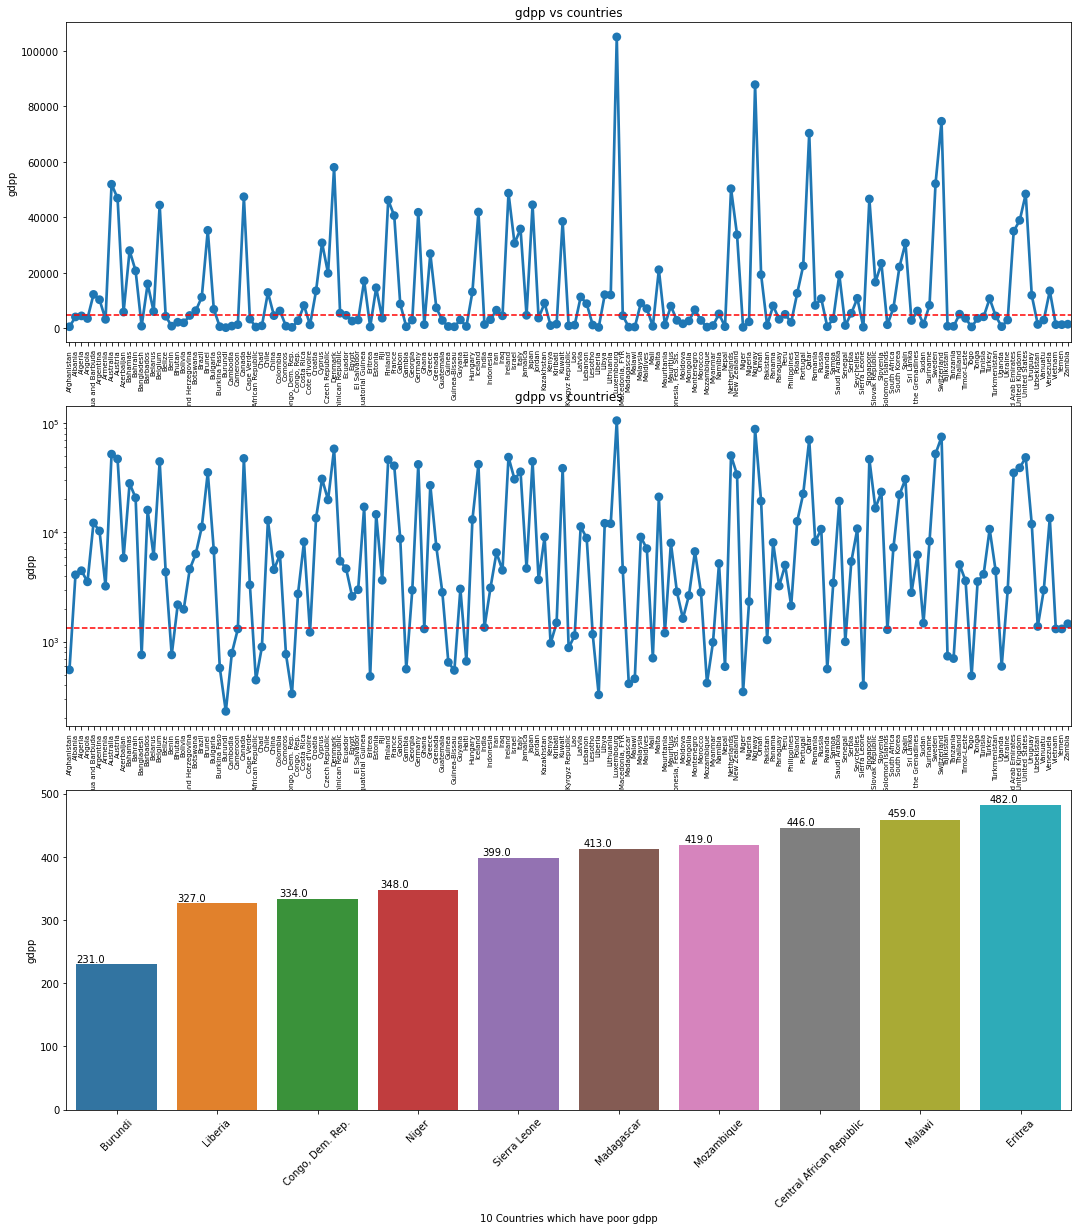

In [22]:
plt.figure(figsize = (18,20))
plt.subplot(3,1,1)
point_plots_with_line("gdpp", 4660) # 4660 is median of GDPP
plt.subplot(3,1,2)
point_plots_with_line("gdpp", 1330, True) # 1330 is 25th percentile of GDPP
plt.subplot(3,1,3)
plot_bottom10_countries("gdpp")
plt.show()

### INFERENCES:

- First plot is little difficult to interpret due to some countries having huge value of GDPP in comparison with other countries.
- Red line in the First plot divides the countries by their median value. i.e countries above the red lines have their GDPP higher than 4660 and countries below the red line have their GDPP lower than 4660.
- Second plot shows the same plot with log scaled in the y-axis and it is a bit easier to interpret.
- Red line in the Second plot divides the countries by their 25th percentile.
- Second plot shows around 37 countries are below the red line and these are the countries of our focus.
- Third plot shows the list of 10 countries that have the low GDPP

### Visualize Income per person across countries

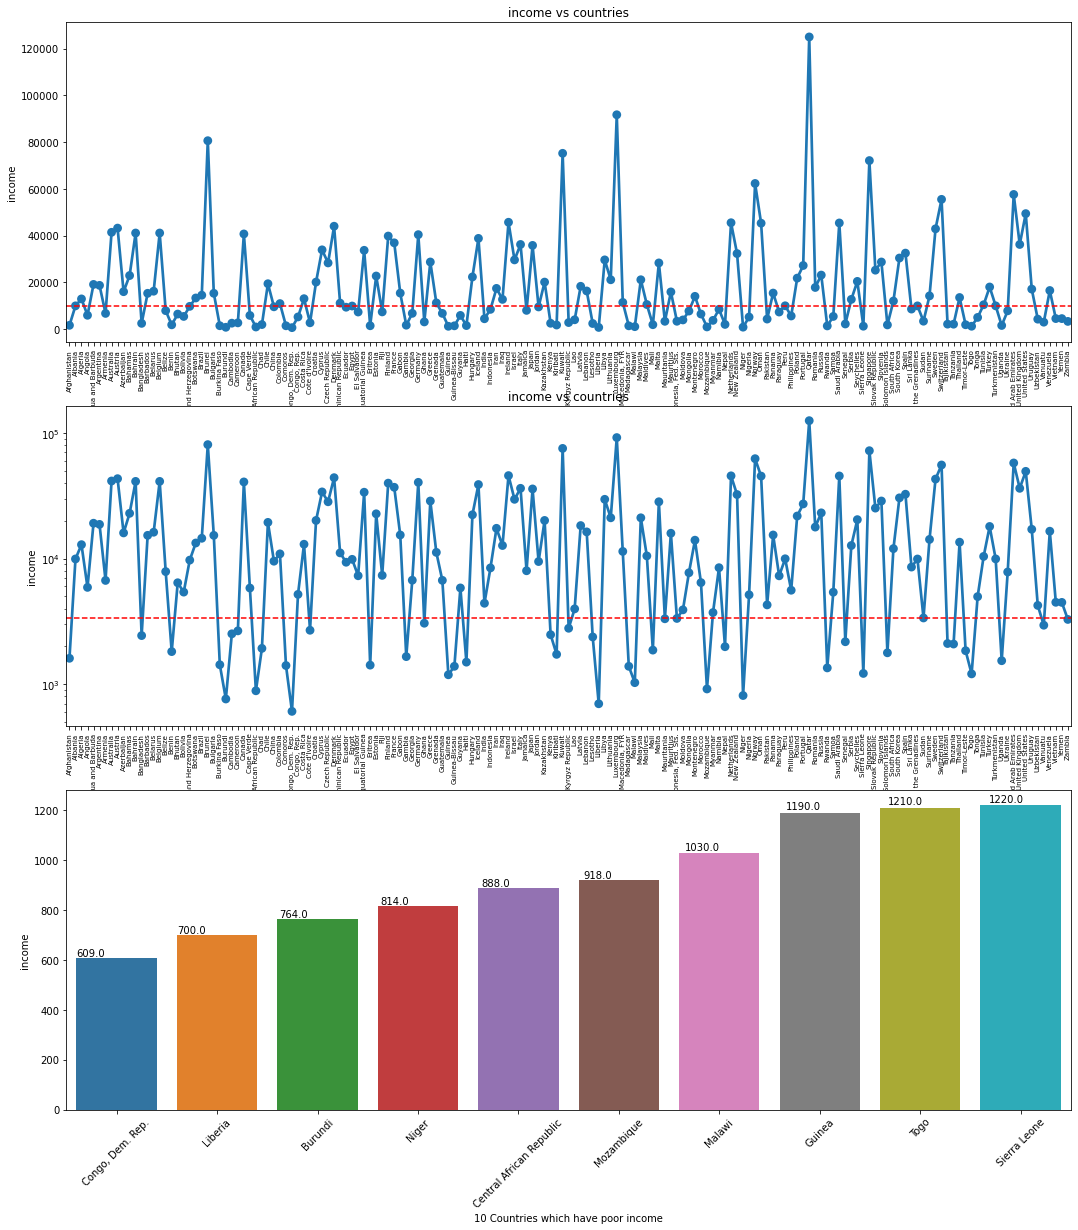

In [23]:
plt.figure(figsize = (18,20))
plt.subplot(3,1,1)
point_plots_with_line("income", 9960) # 9960 is median of income
plt.subplot(3,1,2)
point_plots_with_line("income", 3350, True) # 3350 is 25th percentile of income
plt.subplot(3,1,3)
plot_bottom10_countries("income")
plt.show()

### INFERENCES:

- This plot gives similar inferences as that of GDPP.
- Red line in the First plot divides the countries by their median value. i.e countries above the red lines have their income per person higher than 9960 and countries below the red line have their income per person lower than 9960.
- Second plot shows the same plot with log scaled in the y-axis and it is a bit easier to interpret.
- Red line in the Second plot divides the countries by their 25th percentile.
- Second plot shows around 37 countries are below the red line and these are the countries of our focus.
- Third plot shows the list of 10 countries that have the low income per person

- Comparing this and the previous GDPP plots, we can see that some of the countries are seen below the red line such as Afghanishtan, Congo, Liberia, Niger etc.

### Visualize Child Mortality Rate per 1000 lives across countries

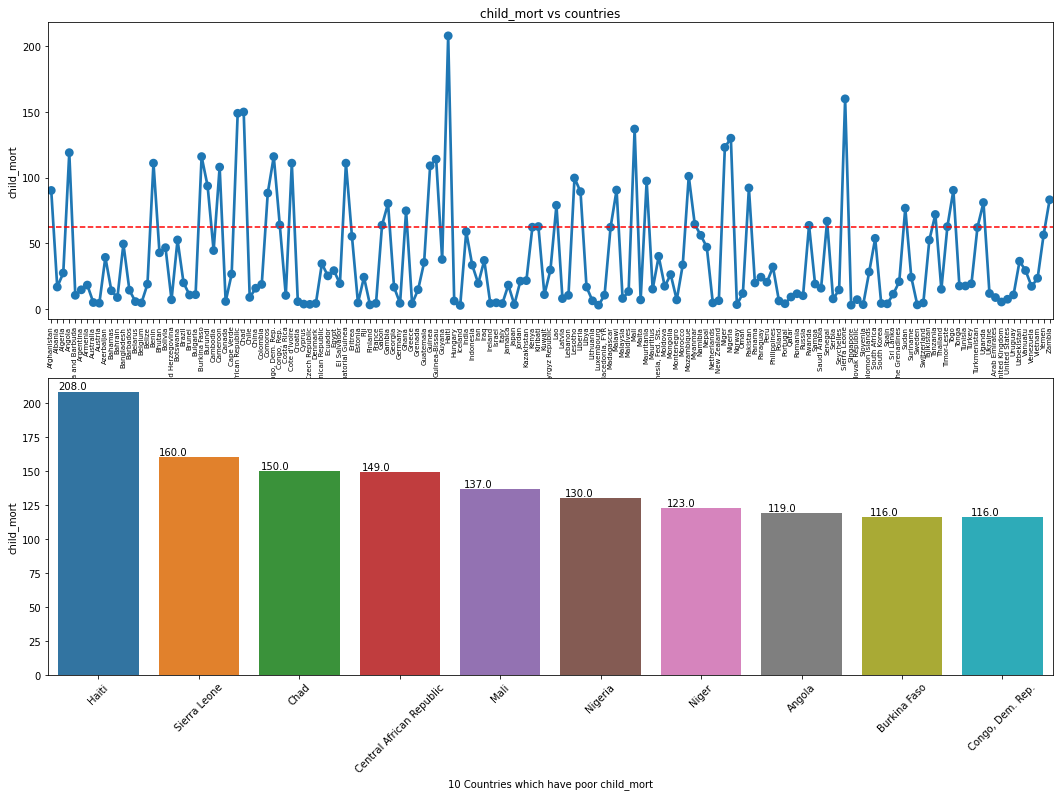

In [24]:
plt.figure(figsize = (18,12))
plt.subplot(2,1,1)
point_plots_with_line("child_mort", 62) # 62 is 75th percentile of child_mort
plt.subplot(2,1,2)
plot_bottom10_countries("child_mort", False)
plt.show()

### INFERENCES:

- This plot gives opposite inferences as that of GDPP and income indicating the countries who are doing well have less child mortality attributing to money being spent on citizens health and nutrition.
- We have chosen 75th percentile i.e. 62 to show the countries which have child mortality rate higher than that per 1000 lives.
- We can see that some of the countries which have low GDPP and low income per person suffer from high mortality rate sucg as Congo, Haiti etc.
- Third plot shows the list of 10 countries that have the high child moratality rate and these seem to be present in Africa where healthcare facilities are poor.

### Visualize bottom 10 countries w.r.t exports, imports, health, inflation, life_expectancy and total fertility rate

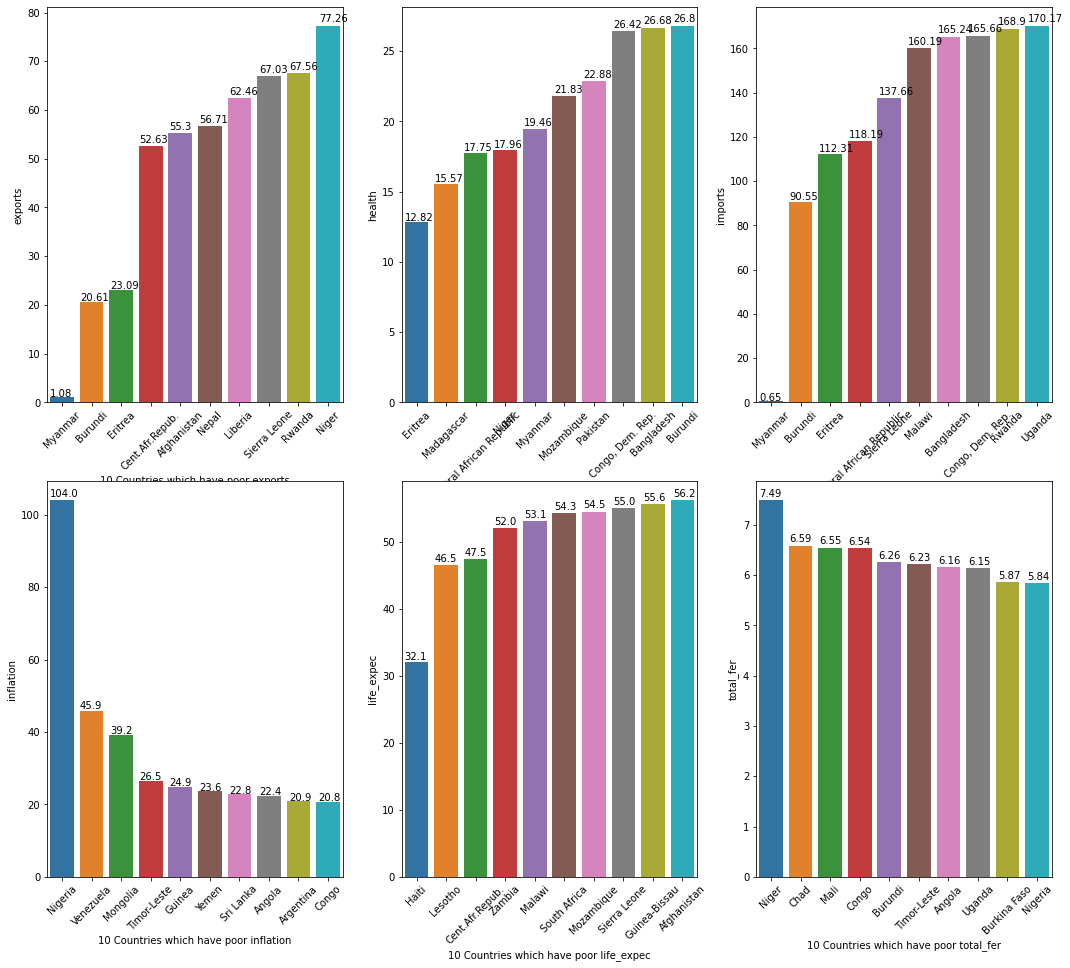

In [25]:
plt.figure(figsize = (18,16))
plt.subplot(2,3,1)
plot_bottom10_countries("exports", sort_order=True, truncate_string=True)
plt.subplot(2,3,2)
plot_bottom10_countries("health")
plt.subplot(2,3,3)
plot_bottom10_countries("imports")
plt.subplot(2,3,4)
plot_bottom10_countries("inflation", sort_order=False, truncate_string=True)
plt.subplot(2,3,5)
plot_bottom10_countries("life_expec", sort_order=True, truncate_string=True)
plt.subplot(2,3,6)
plot_bottom10_countries("total_fer", sort_order=False, truncate_string=True)
plt.show()

### INFERENCES:

- exports, health follow GDPP and income plots pattern and the countries which had low GDPP seem to have low exports.
- imports show a different trend indicating that these countries manufacture a lot of goods sufficiently.
- inflation shows countries that are not stable and not self-sufficient and suffering from other political and social issues. 

Though these plots give us an overall picture of how the countries are doing in terms of GDPP, income and child mortality. Still we will need more statistical data to identify this cluster in particular and to highlight the countries from this cluster which are in need of aid at priority. We will build an unsupervised model based on clustering techniques, which is sensitive to outliers. Due to this, lets proceed and identify outliers and handle those so that we would get better results.

## 2.3.5 Visualising univariate distributions using boxplots to identify outliers

Boxplots are a great way to visualise univariate data because they represent statistics such as the 25th percentile, 50th percentile, etc. We will use the boxplots to analyse the outliers. Lets first see the summary statistics of all the percentiles

In [26]:
country_df.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
10%,4.200000,110.224800,36.502560,211.005600,1524.000000,0.587800,57.820000,1.452000,593.800000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


In [27]:
def boxplot_for_outlier_analysis():
    plt.figure(figsize=[16,12])
    i=1 # to track the ith plot in the subplot
    for col in numerical_cols:
        plt.subplot(3,3,i)
        sns.boxplot(y=country_df[col])
        plt.title(col)
        plt.ylabel('')
        i+=1

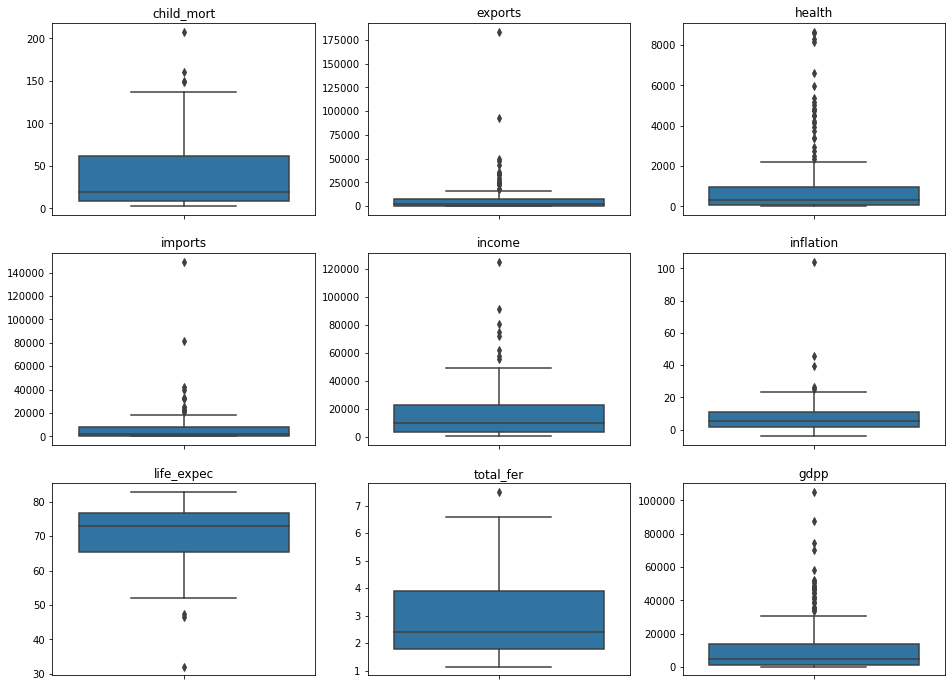

In [28]:
boxplot_for_outlier_analysis()

### Outlier Analysis:

Lets not remove the outliers as it explains the country needs and also deleting outliers will delete lot of countries. Hence, lets find the outliers in the dataset, and then use the following strategies whether to keep those as such or to cap those to the corresponding higher or lower quartile values.


- `child_mort` has only higher outliers and since we need to identify the countries where `child_mort` is high, lets **not cap** these outliers.

- `exports` and `imports` have only higher outliers and this means the country exports are high and the country is doing fine and hence we can **cap these outliers** to the column's 99th percentile.

- `health` has huge amount of higher outliers and this mean that these countries spend relatively lot of money on the health and hence we can **cap these outliers** to the column's 99th percentile.

- `income` has some amount of higher outliers and this mean that people in these countries income are very higher than the other countries and hence we can **cap these outliers** to the column's 99th percentile.

- `inflation` has some higher outliers and these countries might be in need of aid and hence lets **not cap** these outliers.

- `life_expec` has some lower outliers and these are the countries which need our attention and hence lets **not cap** these outliers.

- `total_fer` has some higher outliers and lets **cap these outliers** to 99th percentile

- `gdpp` has huge amount of higher outliers and this indicate that these countries are doing well by themselves and hence we can **cap these outliers** to the column's 99th percentile.


# 3. Prepare the data for modelling
## 3.1 Outlier Treatment

Outliers can be treated in two ways:
1. Statistical treatment where all outliers can be either removed or capped. Since we have dataset of 167 rows, deleting outliers will remove the countries which might be in need of aid. 

2. Domain based outlier treatment:
Here we will cap or remove outliers based on the data's relevance to the business need. We will cap the outliers as discussed in the above section.

There are different ranges in capping the outliers:
- Soft range: 1th and 99th percentile.
- Mid range: 5th and 95th percentile.
- 25th and 75th percentile.

We will be doing **Soft capping** as the data points are few and the capping should not influence the clusters much.

In [29]:
higher_outlier_cols = ['exports','imports','health','income','total_fer','gdpp']

for col in higher_outlier_cols:
    Q4 = country_df[col].quantile(0.99) # Get 99th quantile
    country_df.loc[country_df[col] >= Q4, col] = Q4 # outlier capping

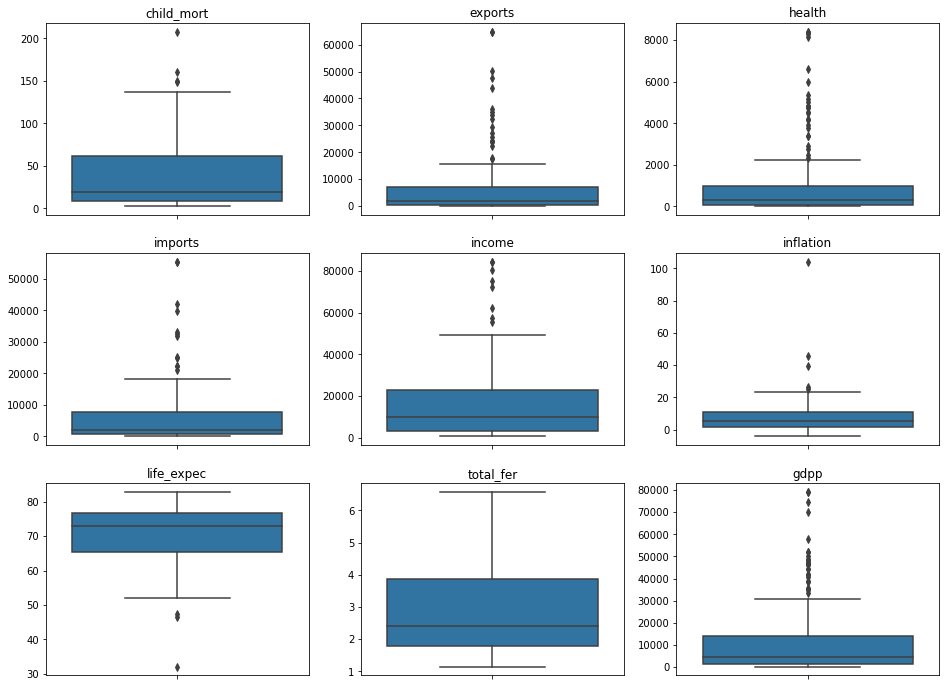

In [30]:
boxplot_for_outlier_analysis()

In [31]:
country_df.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6538.214776,1054.206622,5873.135222,16857.550898,7.781832,70.555689,2.942259,12756.826347
std,40.328931,11415.308590,1790.845342,9422.700869,17957.012855,10.570704,8.893172,1.498340,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
10%,4.200000,110.224800,36.502560,211.005600,1524.000000,0.587800,57.820000,1.452000,593.800000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


There are some outliers present in the data after outlier treatment as we have used soft capping. Lets proceed and cluster the countries based on the prepared data.

## 3.2 Hopkins test to understand cluster tendency

- Before we apply any clustering algorithm to the given data, it's important to check whether the given data has some meaningful clusters or not. This usually means the given data is not random. 

- The process to evaluate the data to check if the data is feasible for clustering or not is know as the **clustering tendency**. 

- To check cluster tendency, we use **Hopkins test.**

- `Hopkins test` examines whether data points differ significantly from uniformly distributed data in the multidimensional space.

In [32]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [33]:
hopkins(country_df[numerical_cols])

0.9481380455276717

### Interpretation of Hopkins score:

- Hopkins Statistic over .70 is a good score that indicated that the data is good for cluster analysis. 
- A 'Hopkins Statistic' value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.


Hopkins test results will vary as it picks a set of samples each time. On running it multiple times, it can be seen that this data set gives Hopkins statistic value in the range of 0.86 to 0.97 and hence our dataset is good for clustering and lets proceed our analysis 

## 3.3 Scaling

- Feature scaling is essential for machine learning algorithms that calculate distances between data. 
- Most of distance based models e.g. k-means and Hierarchical clustering need standard scaling so that large-scaled features don't dominate the variation.
- If we do not scale, the feature with a higher value range starts dominating when calculating distances
- We have chosen `StandardScaler` as clustering does not work well when the variance differs a lot.

In [34]:
# Scaling on numerical features

scaler = StandardScaler() # instantiate scaler

country_df_scaled = scaler.fit_transform(country_df[numerical_cols]) # fit parameters to have mean 0 and SD as 1 and transform data accordingly
country_df_scaled = pd.DataFrame(country_df_scaled, columns = numerical_cols) # convert to dataframe
country_df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.543736,-0.032042
...,...,...,...,...,...,...,...,...,...
162,-0.225578,-0.452874,-0.503105,-0.458563,-0.776821,-0.489784,-0.852161,0.373359,-0.563175
163,-0.526514,-0.236420,-0.219189,-0.372256,-0.019971,3.616865,0.546361,-0.316136,0.042765
164,-0.372315,-0.491607,-0.540250,-0.513337,-0.690802,0.409732,0.286958,-0.664231,-0.658699
165,0.448417,-0.539950,-0.552429,-0.577202,-0.691361,1.500916,-0.344633,1.156572,-0.658699


# 4. Build model using K-means algorithm for clustering

Now that scaling is done on all numerical features, lets build the unsupervised model using clustering technique. There are many algorithms available in clustering. We will pick two common algorithms such as 
1. K-means algorithm
2. Hierachical Clustering

and build the model using both the methods and cluster the countries identify the countries in need

**Kmeans algorithm** is an iterative algorithm that tries to partition the dataset into K pre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group.


## 4.1 Metrics to choose the value of K
The main challenge in this algorithm is to find the optimal value of k or `number of clusters`. There are two common approaches that help to find k:

1. Elbow method
2. Silhouette Analysis

### 4.1.1 Elbow Method

Elbow method gives us an idea on what a good k number of clusters would be based on the `sum of squared distance (SSD) ` between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow. 

Lets use `KMeans()` from `sklearn` to form clusters of 2,3,4 and so on till 11 and calculate SSD and plot the number of clusters and SSD and see where the elbow is formed.

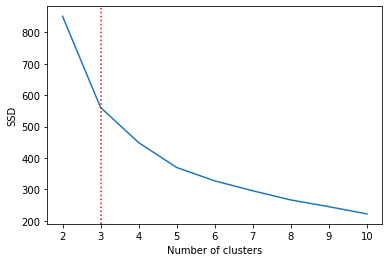

In [35]:
# Elbow curve-ssd
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country_df_scaled)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
ax = plt.axes()
ax.plot(temp[0], temp[1]) # plot the SSDs for each n_clusters
ax.axvline(3, ls='dotted',color='red') # elbow formed as 3
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

### INFERENCE:

SSD flattens and forms an elbow at 3 indicating that 3 is optimal value of k.

### 4.1.2 Silhouette Analysis

The silhouette score is a measure of how similar an object is to its own cluster (`cohesion`) compared to other clusters (`separation`).

Lets use `KMeans()` from `sklearn` to form clusters of 2,3,4 and so on till 11 and calculate `silhouette_score` and plot the `number of clusters` against `silhouette_score`

For k_clusters=2, the silhouette score is 0.478554
For k_clusters=3, the silhouette score is 0.423307
For k_clusters=4, the silhouette score is 0.409140
For k_clusters=5, the silhouette score is 0.415465
For k_clusters=6, the silhouette score is 0.305925
For k_clusters=7, the silhouette score is 0.307073
For k_clusters=8, the silhouette score is 0.311302
For k_clusters=9, the silhouette score is 0.303071
For k_clusters=10, the silhouette score is 0.295959


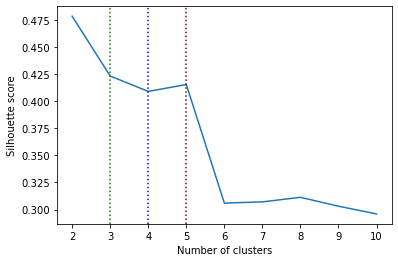

In [36]:
# Silhouette score

from sklearn.metrics import silhouette_score
silhouette_scores_list = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(country_df_scaled) # intialise kmeans
    silhouette_avg = silhouette_score(country_df_scaled, kmean.labels_) # silhouette score
    silhouette_scores_list.append([k, silhouette_avg])
    print("For k_clusters={0}, the silhouette score is {1:2f}".format(k, silhouette_avg))
    
temp = pd.DataFrame(silhouette_scores_list)    
ax = plt.axes()
ax.plot(temp[0], temp[1])
ax.axvline(3, ls='dotted',color='green') # elbow formed as 3
ax.axvline(4, ls='dotted',color='blue') # elbow formed as 3
ax.axvline(5, ls='dotted',color='maroon') # elbow formed as 3
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

### INFERENCES:

- The silhouette score is maximum when k is 2 which is 0.47
- 2 is very less number of clusters and countries within the 2 clusters might be very different.

So lets look at the next optimal silhouette score.

- 3,4,5 seem to have good silhouette scores. As k increases, silhouette score decreases and hence these will have definitely lesser sihouette score than that of k=2.
- Though elbow curve indicate 3 is optimal number and silhouette score of 3 seem to be the best, lets use K-means algorithm for k=3,4,5 and see which value of k gives us better `cluster profiling`

## 4.2 Iterating with k=3,4 and 5

In [37]:
# Function for all steps of Kmean Clustering; Call with K=3,4,5
def K_means_model(k):
    kmean = KMeans(n_clusters = k, random_state = 50+k)
    kmean.fit(country_df_scaled)
    country_df_kmean = country_df.copy() # copy the actual data into a new dataframe to explain the cluster profiling
    label  = pd.DataFrame(kmean.labels_, columns= ['k_means_cluster_label'])
    country_df_kmean = pd.concat([country_df_kmean, label], axis =1) # assign the countries with the cluster labels.
    print("Number of countries in each cluster(k=%s):" %k)
    print(country_df_kmean.k_means_cluster_label.value_counts())# shows how many countries are in each cluster
    return(country_df_kmean) # returns clustered labelled dataset for further analysis

In [38]:
# Created Models are available globally to access inside cluster profiling functions
k_3_model = K_means_model(3) # K means model with 3 clusters
k_4_model = K_means_model(4) # K means model with 4 clusters
k_5_model = K_means_model(5) # K means model with 5 clusters

Number of countries in each cluster(k=3):
1    92
0    48
2    27
Name: k_means_cluster_label, dtype: int64
Number of countries in each cluster(k=4):
2    80
1    48
0    30
3     9
Name: k_means_cluster_label, dtype: int64
Number of countries in each cluster(k=5):
4    78
0    47
1    30
2     9
3     3
Name: k_means_cluster_label, dtype: int64


### Cluster Analysis:

We can see that when there are 3 or 4 clusters, there are some distribution of countries. When there are 5 clusters, there is a country which is in a separate cluster. This would make actionable items a bit tedious. We will progress with these 3 models and profile the clusters created by each model based on 3 important parameters i.e **GDPP, Income and Child_mortality** and see which is a good value of k.

In [39]:
# Function for Profiling Clusters to plot scatter plots
def clusters_scatter_plots(col1, col2):
    plt.figure(figsize=(18,8))
    plt.subplot(2,2,1)
    sns.scatterplot(x = col1, y = col2, hue = 'k_means_cluster_label', data = k_3_model, palette=['blue','green','red'])
    plt.subplot(2,2,2)
    sns.scatterplot(x = col1, y = col2, hue = 'k_means_cluster_label', data = k_4_model, palette=['orange','blue','green','red'])
    plt.subplot(2,2,3)
    sns.scatterplot(x = col1, y = col2, hue = 'k_means_cluster_label', data = k_5_model, palette=['red','orange','maroon','green','blue'])

### Visualization of GDPP vs Income when k=3,4,5

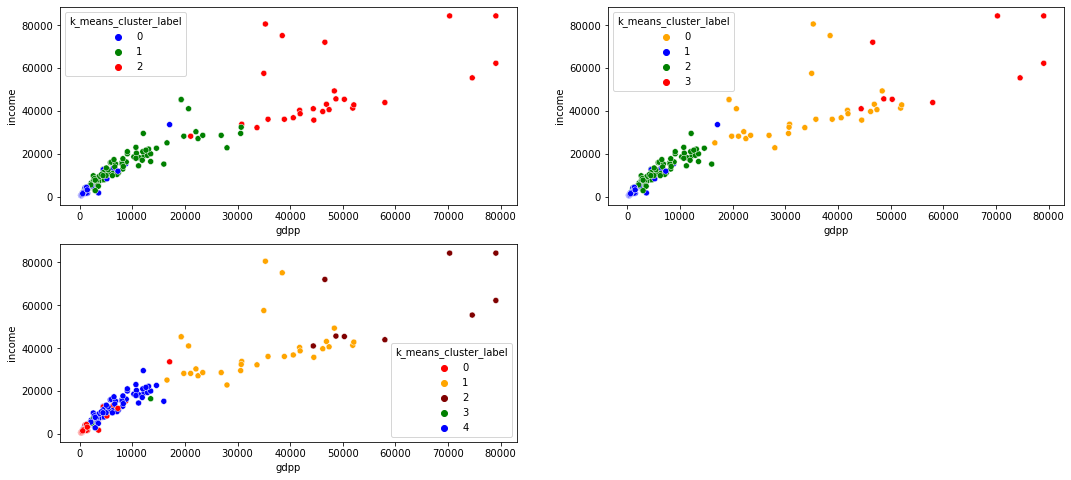

In [40]:
clusters_scatter_plots('gdpp','income')

### INFERENCES:

- When there are 3 or 4 clusters, there is a distinct separation of the clusters.
- When there are 5 clusters, as we have seen previously that one of the clusters has just one country, it cannot be seen evidently here.

Lets visualize the clusters more and see which helps in understanding the clusters and identifying countries in need.

### Visualization of GDPP vs Child mortality when k=3,4,5

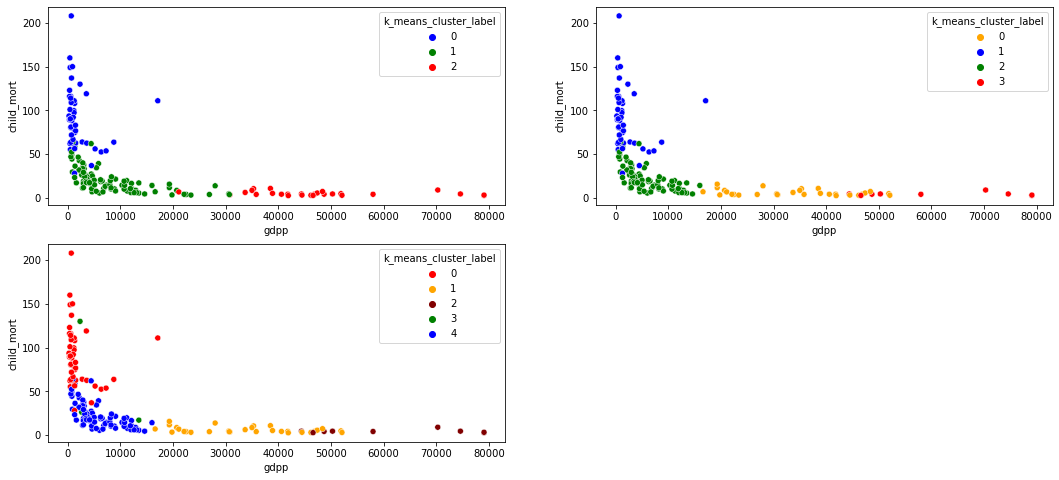

In [41]:
clusters_scatter_plots('gdpp','child_mort')

### INFERENCES:

This plot is very helpful to see the clustered groups. For e.g. when k=3, we see that cluster 2 require aid as their gdpp is low and child mortality is pretty high.

As the cluster labels are picked in random and assigned, we can see similar group is represented as 3 when k=4 and k=5.

### Visualization of Child mortality vs Income when k=3,4,5

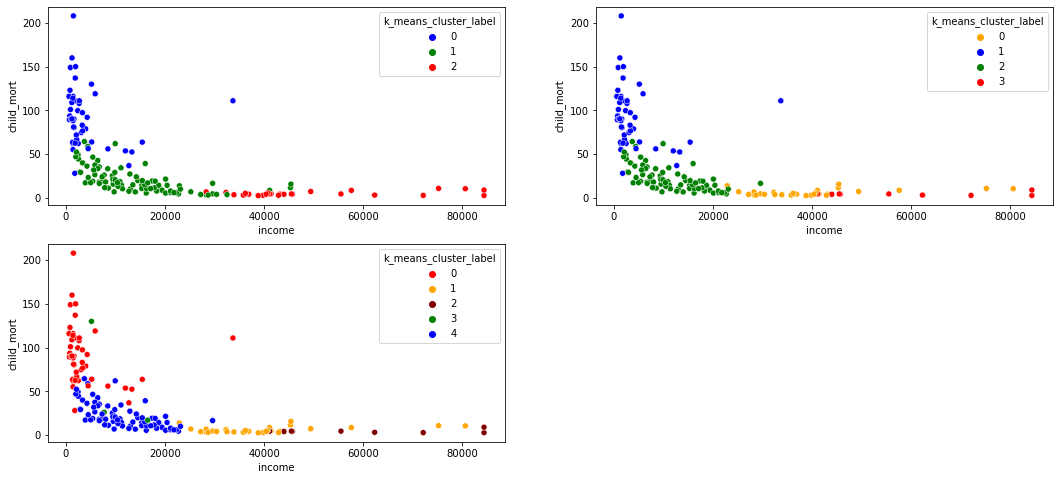

In [42]:
clusters_scatter_plots('income','child_mort')

### INFERENCES:

As we saw in previous two scatter plots, we can see that same cluster which had bad child_moratality rate and low gdpp has low income in this plot.

### Visualization of univariate distributions when k=3,4,5

Lets also do some boxplots to understand the gdpp, income and child_mortality data distributions within each cluster:

In [43]:
# Function for Profiling Clusters to plot box plots
def clusters_box_plots(column_name, logy=False):
    #plt.figure(figsize=(18,8))
    
    if logy:
        i=1
    else:
        i=0
    
    plt.subplot(2+i,2,1)
    sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_3_model, palette=['red','green','blue'])
    if logy:
        plt.subplot(3,2,2)
        sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_3_model, palette=['red','green','blue'])
        plt.yscale('log')

    plt.subplot(2+i,2,2+i)
    sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_4_model, palette=['orange', 'blue','green','red'])    
    if logy:
        plt.subplot(3,2,4)
        sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_4_model, palette=['orange','blue','green','red'])
        plt.yscale('log')
        
    plt.subplot(2+i,2,3+i+i)
    sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_5_model, palette=['red','blue','maroon','green','orange'])
    if logy:
        plt.subplot(3,2,6)
        sns.boxplot(x = 'k_means_cluster_label', y = column_name, data = k_5_model, palette=['red','blue','maroon','green','orange'])
        plt.yscale('log')    

### Visualization of GDPP distribution when k=3,4,5

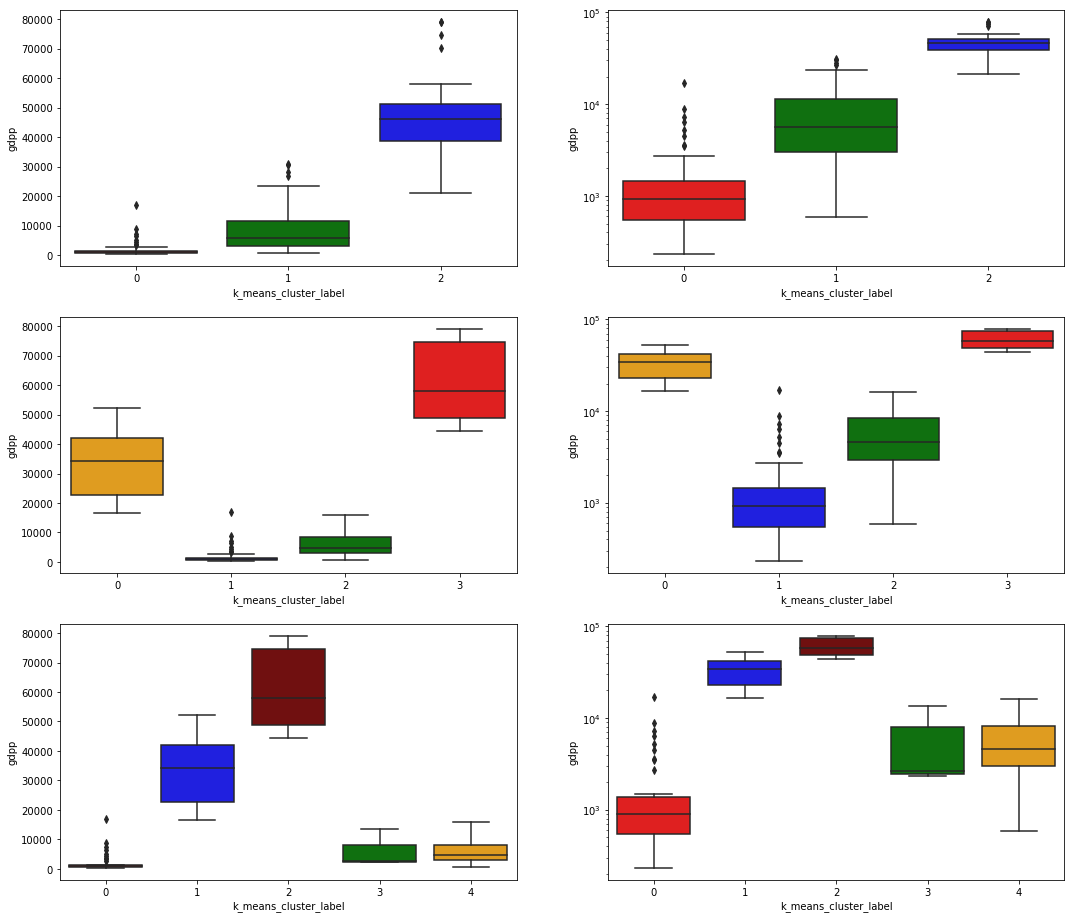

In [44]:
plt.figure(figsize = (18,16))
clusters_box_plots('gdpp',True) # log scaled
plt.show()

### INFERENCES:

- First set of 3 plots at the left show the distribution without log scale and the next 3 plots show the distribution with GDPP log scaled
- GDPP of the developed countries are so high that we are unable to see the GDPP of the poor countries properly in this boxplot.
- From the right side 3 plots, it can be seen that GDPP of cluster 0 is in the range of 10000(10^4) and cluster 1 is in 100000(10^5) whereas cluster 2 is in range of 10^3 indicating help
- There is a slight overlap in the clusters when k=5 and k=4

### Visualization of Income distribution when k=3,4,5

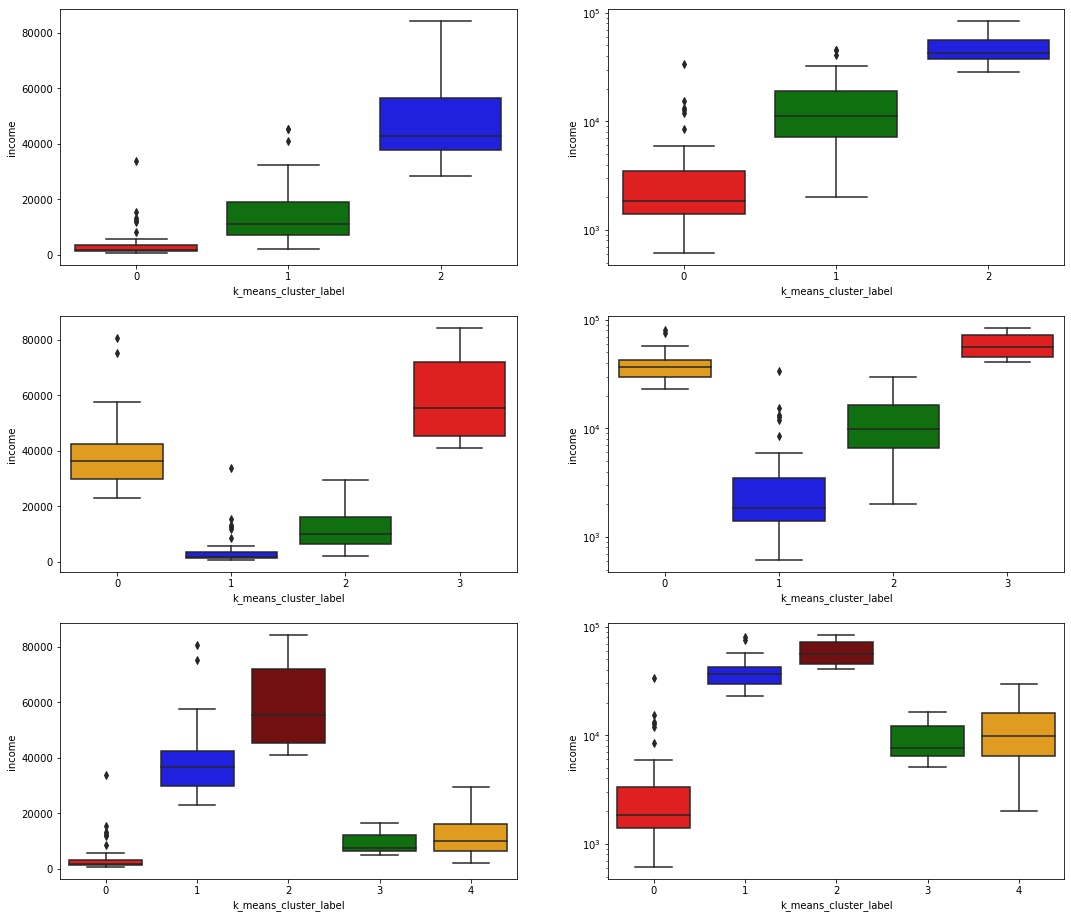

In [45]:
plt.figure(figsize = (18,16))
clusters_box_plots('income',True) # log scaled
plt.show()

### INFERENCES:

- Income follows the same pattern as that of GDPP.
- The clusters are seggregated well when k=3 and slightly overlaps when k=4 and k=5
- k=3 seems to be a good indicator of k as the cohesion within the cluster is good and clusters are well separated.

### Visualization of Child mortality distribution when k=3,4,5

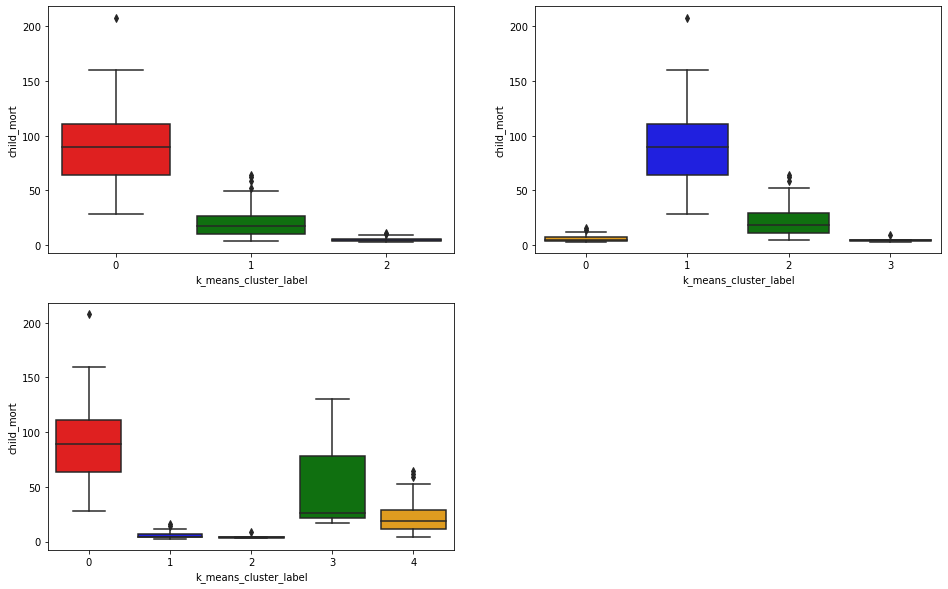

In [46]:
plt.figure(figsize = (16,10))
clusters_box_plots('child_mort')
plt.show()

### INFERENCES:

- Child mortality follows the opposite pattern of GDPP and income.
- Clusters which were high on GDPP and income have less child mortality, indicating that these countries have ample amount of money to take care of child mortaliy and health issues.
- We can see that k=3 gives good clusters as the cohesion within the cluster is good and clusters are well separated.

### Visualization of Mean of GDPP, income and Child mortality when k=3,4,5

<Figure size 1296x576 with 0 Axes>

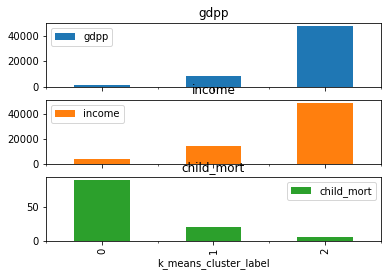

In [47]:
plt.figure(figsize=(18,8))
grouped_df_k3 = k_3_model[['gdpp', 'income', 'child_mort','k_means_cluster_label']].groupby('k_means_cluster_label').mean()
axes = grouped_df_k3.plot.bar(subplots=True)
plt.show()

### INFERENCES:

When K=3, the clusters can be profiled as
- 0 : Medium GDPP, medium Income and mild child mortality rate.
- 1 : High GDPP, High income and very low child mortality rate.
- 2 : Low GDPP, Low income and very high mortality rate.

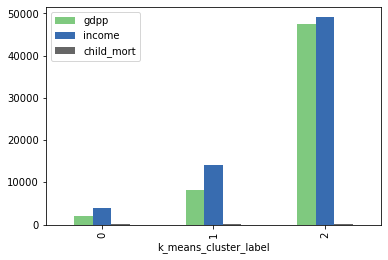

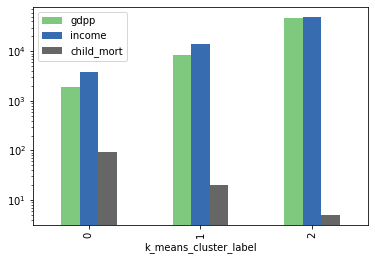

In [48]:
# Profiling GDP, INCOME AND CHID_MORT together

grouped_df_k3.plot(kind='bar', colormap='Accent')    
grouped_df_k3.plot(kind='bar',logy=True, colormap='Accent')    
plt.show()

### INFERENCES:

This gives a very good inference about each cluster.

- 0 : Medium GDPP, medium Income and mild child mortality rate.
- 1 : High GDPP, High income and very low child mortality rate.
- 2 : Low GDPP, Low income and very high mortality rate and has to be focussed.

<Figure size 1296x576 with 0 Axes>

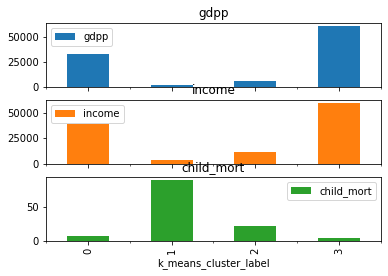

In [49]:
plt.figure(figsize=(18,8))
grouped_df_k4 = k_4_model[['gdpp', 'income', 'child_mort','k_means_cluster_label']].groupby('k_means_cluster_label').mean()
axes = grouped_df_k4.plot.bar(subplots=True)
plt.show()

### INFERENCES:

When K=4, the clusters 1 and 2 are a bit similar and it seems to be in same cluster when k=3. Lets profile the clusters as
- 0 : Medium GDPP, medium Income and mild child mortality rate.
- 1 : High GDPP, High income and very low child mortality rate.
- 2 : Very high GDPP, Very high income and very low child mortality rate.
- 3 : Low GDPP, Low income and very high mortality rate

Since we are concerned about the countries not doing well, this granular seggregation of countries doing well is not of our primary concern. 

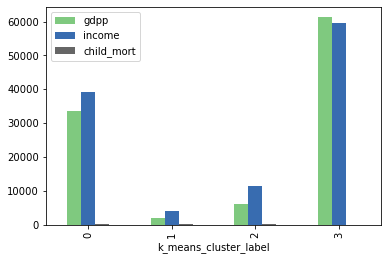

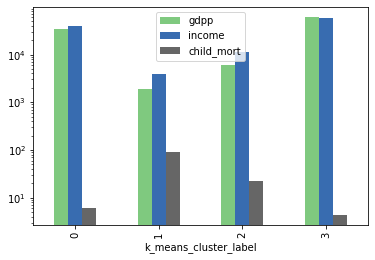

In [50]:
# Profiling GDP, INCOME AND CHID_MORT together
grouped_df_k4.plot(kind='bar', colormap='Accent')    
grouped_df_k4.plot(kind='bar',logy=True, colormap='Accent')    
plt.show()

### INFERENCES:

Not much of difference between clusters 2 and 1 and these can be represented in a single cluster leading to k=3 being a good number

<Figure size 1296x576 with 0 Axes>

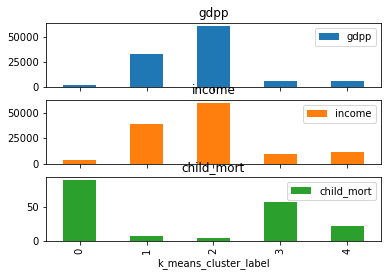

In [51]:
plt.figure(figsize=(18,8))
grouped_df_k5 = k_5_model[['gdpp', 'income', 'child_mort','k_means_cluster_label']].groupby('k_means_cluster_label').mean()
axes = grouped_df_k5.plot.bar(subplots=True)
plt.show()

### INFERENCES:

- The clusters 1 and 3 are a bit similar and it seems to be in same cluster when k=3 
- Cluster 4 is not effective as its just one country and we cannot compare it with other clusters.So k=5 is not effective for identifying the countries that are in need of aid.

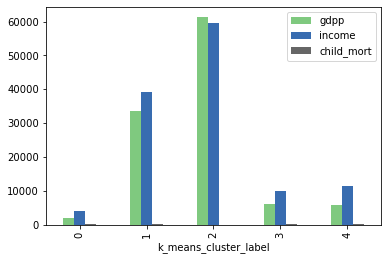

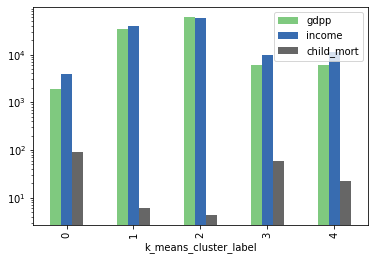

In [52]:
# Profiling GDP, INCOME AND CHID_MORT together
grouped_df_k5.plot(kind='bar', colormap='Accent')    
grouped_df_k5.plot(kind='bar',logy=True, colormap='Accent')    
plt.show()

In [53]:
k_5_model[k_5_model['k_means_cluster_label']==4]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster_label
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.49,76.3,1.65,4090.0,4
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.10,76.5,2.89,4460.0,4
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.44,76.8,2.13,12200.0,4
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.90,75.8,2.37,10300.0,4
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.77,73.3,1.69,3220.0,4
...,...,...,...,...,...,...,...,...,...,...,...
156,Ukraine,11.7,1398.87,229.284,1517.67,7820.0,13.40,70.4,1.44,2970.0,4
160,Uruguay,10.6,3129.70,993.650,3022.60,17100.0,4.91,76.4,2.08,11900.0,4
161,Uzbekistan,36.3,437.46,80.178,393.30,4240.0,16.50,68.8,2.34,1380.0,4
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950.0,2.62,63.0,3.50,2970.0,4


### INFERENCES:

When K=5, we saw that there was only one country in cluster 4.

- Clusters 1 and 3 are similar
- Cluster 0 and 4 are also similar.

Our concern is on clusters 2 and 3. But if they are spread across clusters, its difficult to find which country needs the aid at most than the other. So lets go with k=3 as optimal number of clusters.

### 4.3 Final Model: K-means clustering with K =3 `

Now that we have solved the biggest challenge in K-means algorithm i.e. Find the optimal value of k, we can build our final model using k=3. Lets run `K-means` algorithm on the scaled data set as the clustering takes Euclidean distance as a measure

In [54]:
kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(country_df_scaled)

KMeans(n_clusters=3, random_state=50)

#### Creating Cluster labels using K-means
Since scaled data will be a bit confusing while explaining to business people, we will copy the actual data into a new dataframe to explain the cluster labels. We will use this `country_df_kmean_3` for cluster profiling. Lets create a column called `k_means_cluster_label` and concatenate to the `country_df_kmean_3` to assign the countries with the cluster labels.

In [55]:
country_df_kmean = country_df.copy() # copy df into new df, as the same df will be used for hierarchical clustering too.
label  = pd.DataFrame(kmean.labels_, columns= ['k_means_cluster_label'])
label.head()

,k_means_cluster_label
0,1
1,0
2,0
3,1
4,0


In [56]:
country_df_kmean = pd.concat([country_df_kmean, label], axis =1)
country_df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster_label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


### 4.4 INITIAL CLUSTER PROFILING

- `value_counts` shows how many countries are clustered under each cluster label. 
- Lets analyse these 3 clusters and see if we can profile these clusters by comparing their `gdpp`, `child_mort`, `income`
- Lets visualize these clusters using `scatter plots`, `barplots` and `boxplots`
- We also need to analyse the clusters and see if k=3 helps us to identify the countries which are in dire need of aid

In [57]:
country_df_kmean.k_means_cluster_label.value_counts()

0    92
1    48
2    27
Name: k_means_cluster_label, dtype: int64

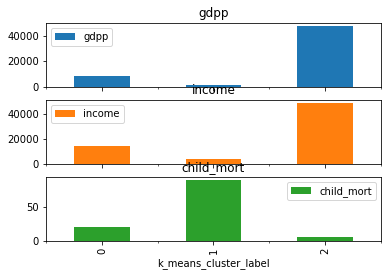

In [58]:
# Profiling GDP, INCOME AND CHID_MORT in separate plots

grouped_df = country_df_kmean[['gdpp', 'income', 'child_mort','k_means_cluster_label']].groupby('k_means_cluster_label').mean()
axes = grouped_df.plot.bar(subplots=True)
plt.show()

<AxesSubplot:xlabel='k_means_cluster_label'>

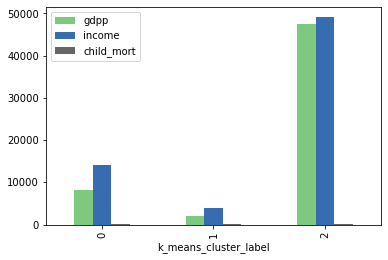

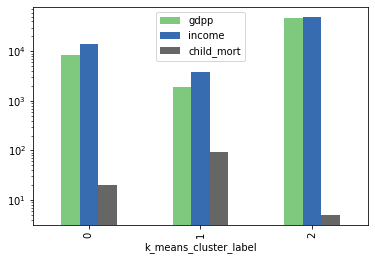

In [59]:
# Profiling GDP, INCOME AND CHID_MORT together
grouped_df.plot(kind='bar', colormap='Accent')
grouped_df.plot(kind='bar',logy=True, colormap='Accent')

### INFERENCES:

From the above three plots, We can see that the clusters are grouped as
- 0 : Medium GDPP, medium Income and mild child mortality rate.
- 1 : High GDPP, High income and very low child mortality rate.
- 2 : Low GDPP, Low income and very high mortality rate.

### 4.5 Countries Segmentation

We can rename the labels for better business understanding as cluster label 0, 1 and 2 does not make sense to interpret. Then we will perform the cluster profiling with new labels.

Lets rename the cluster labesl as 
- 0 : Developing Countries
- 1 : Developed Countries
- 2 : Under-developed Countries

This would help the NGO to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries and focus on **Cluster 2: Under-developed Countries**

In [60]:
# Medium income, Medium GDP and Slightly high Child_mort
# Filter the data for that clsuter

country_df_kmean.loc[country_df_kmean['k_means_cluster_label'] == 0,'k_means_cluster_label'] ='Developing Countries'
country_df_kmean[country_df_kmean['k_means_cluster_label'] == 'Developing Countries']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster_label
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.49,76.3,1.65,4090.0,Developing Countries
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.10,76.5,2.89,4460.0,Developing Countries
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.44,76.8,2.13,12200.0,Developing Countries
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.90,75.8,2.37,10300.0,Developing Countries
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.77,73.3,1.69,3220.0,Developing Countries
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,3129.70,993.650,3022.60,17100.0,4.91,76.4,2.08,11900.0,Developing Countries
161,Uzbekistan,36.3,437.46,80.178,393.30,4240.0,16.50,68.8,2.34,1380.0,Developing Countries
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950.0,2.62,63.0,3.50,2970.0,Developing Countries
163,Venezuela,17.1,3847.50,662.850,2376.00,16500.0,45.90,75.4,2.47,13500.0,Developing Countries


In [61]:
country_df_kmean[country_df_kmean['k_means_cluster_label'] == 'Developing Countries'].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,20.177174,3650.066288,573.165330,3759.545881,14169.456522,6.995435,73.552174,2.225652,8226.869565
std,14.095983,3758.035772,623.537749,3463.217447,9474.287745,7.768033,4.097908,0.679580,7140.250011
min,3.200000,1.076920,19.463600,0.651092,1990.000000,-4.210000,63.000000,1.230000,592.000000
25%,10.275000,1003.987500,179.336250,1375.405000,7150.000000,1.735000,70.400000,1.590000,3027.500000
50%,17.150000,1876.810000,366.440000,2370.465000,11300.000000,5.025000,74.100000,2.165000,5645.000000
75%,26.200000,5184.400000,740.455000,5183.775000,19175.000000,9.187500,76.400000,2.642500,11450.000000
max,64.400000,15046.200000,2928.780000,14718.600000,45400.000000,45.900000,81.900000,4.340000,30700.000000


Summary statistics show that the variation within the group is very less and mean and median are so close. So this clustering is good.

In [62]:
# Developed Countries: High income, High GDP and Low Child_mort
# Filter the data for that clsuter
country_df_kmean.loc[country_df_kmean['k_means_cluster_label'] == 1,'k_means_cluster_label'] ='Developed Countries'
country_df_kmean[country_df_kmean['k_means_cluster_label'] == 'Developed Countries']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster_label
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.8200,553.0,Developed Countries
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,Developed Countries
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.3600,758.0,Developed Countries
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.8800,6350.0,Developed Countries
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,Developed Countries
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,Developed Countries
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.1100,1310.0,Developed Countries
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,Developed Countries
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,Developed Countries
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.7500,769.0,Developed Countries


In [63]:
country_df_kmean[country_df_kmean['k_means_cluster_label'] == 'Developed Countries'].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.972233,1909.208333
std,34.319855,2252.474004,165.518331,1540.981910,5590.168621,15.362485,6.384914,0.995640,2925.911009
min,28.100000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,2.590000,231.000000
25%,63.675000,102.873750,34.005875,193.319500,1390.000000,4.080000,56.725000,4.475000,551.500000
50%,89.750000,196.260000,51.613500,339.306000,1860.000000,8.855000,59.800000,5.055000,932.000000
75%,111.000000,552.522500,95.303250,801.000000,3522.500000,16.600000,62.825000,5.597500,1465.000000
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.100000,6.563600,17100.000000


Summary statistics show that the variation within the group is very less and mean and median are so close. So this clustering is good.

Also the stats of this cluster and the previous cluster has wide difference.

In [64]:
# Under-Developed Countries:Low income, Low GDP and High Child_mort
# Filter the data for that clsuter

country_df_kmean.loc[country_df_kmean['k_means_cluster_label'] == 2,'k_means_cluster_label'] ='Under-Developed Countries'
country_df_kmean[country_df_kmean['k_means_cluster_label'] == 'Under-Developed Countries']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster_label
7,Australia,4.8,10276.20,4530.8700,10847.10,41400.0,1.160,82.0,1.93,51900.0,Under-Developed Countries
8,Austria,4.3,24059.70,5159.0000,22418.20,43200.0,0.873,80.5,1.44,46900.0,Under-Developed Countries
15,Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,Under-Developed Countries
23,Brunei,10.5,23792.20,1002.5200,9884.00,80600.0,16.700,77.1,1.84,35300.0,Under-Developed Countries
29,Canada,5.6,13793.40,5356.2000,14694.00,40700.0,2.870,81.3,1.63,47400.0,Under-Developed Countries
42,Cyprus,3.6,15461.60,1838.7600,17710.00,33900.0,2.010,79.9,1.42,30800.0,Under-Developed Countries
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,Under-Developed Countries
53,Finland,3.0,17879.40,4134.9000,17278.80,39800.0,0.351,80.0,1.87,46200.0,Under-Developed Countries
54,France,4.2,10880.80,4831.4000,11408.60,36900.0,1.050,81.4,2.03,40600.0,Under-Developed Countries
58,Germany,4.2,17681.40,4848.8000,15507.80,40400.0,0.758,80.1,1.39,41800.0,Under-Developed Countries


In [65]:
country_df_kmean[country_df_kmean['k_means_cluster_label'] == 'Under-Developed Countries'].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,5.092593,26440.026667,4363.327807,22045.851111,49057.333333,3.120407,80.462963,1.775185,47476.888889
std,2.319470,16535.307518,2290.539971,13644.366817,16604.947131,4.399902,1.540017,0.293380,14286.719313
min,2.600000,6001.600000,1002.520000,6052.000000,28300.000000,-3.220000,76.500000,1.150000,21100.000000
25%,3.400000,12381.600000,2624.530000,11556.300000,37850.000000,0.803000,79.950000,1.490000,38700.000000
50%,4.300000,24059.700000,4475.530000,17710.000000,42900.000000,1.570000,80.500000,1.870000,46200.000000
75%,5.900000,34389.100000,5257.600000,28639.400000,56550.000000,3.780000,81.450000,1.965000,51100.000000
max,10.800000,64794.260000,8410.330400,55371.390000,84374.000000,16.700000,82.800000,2.210000,79088.000000


Summary statistics show that the variation within the group is very less and mean and median are so close. So this clustering is good.

Also the stats of this cluster and the previous clusters has wide difference.

Hence cohesion and separation are well preserved in this clustering

Now that we have segmented the clusters and renamed properly, it will be easy to interpret the plots. Lets do the cluster profiling with the new cluster labels. 

### 4.6 CLUSTER PROFILING WITH NEW LABELS

In [66]:
profiling_cols = ['gdpp','child_mort','income'] # create a list to store profiling variables

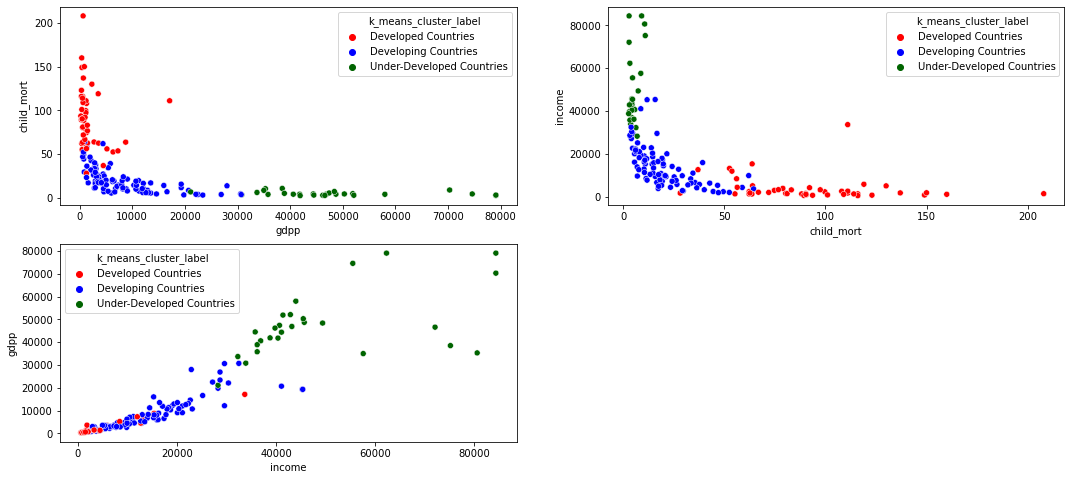

In [67]:
# Plot the cluster
plt.figure(figsize=(18,8))
i=0
for i in range(len(profiling_cols)):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x = profiling_cols[i], y = profiling_cols[(i+1)%len(profiling_cols)], hue = 'k_means_cluster_label', data = country_df_kmean, palette=['red','blue','darkgreen'])

### INFERENCES:

These new labels help us to interpret the plots in a better fashion. We can see that 
- Developing countries have Medium GDPP, medium Income and mild child mortality rate.
- Developed countries have High GDPP, High income and very low child mortality rate.
- Under-Developed countries have Low GDPP, Low income and very high mortality rate and should be our primary focus.

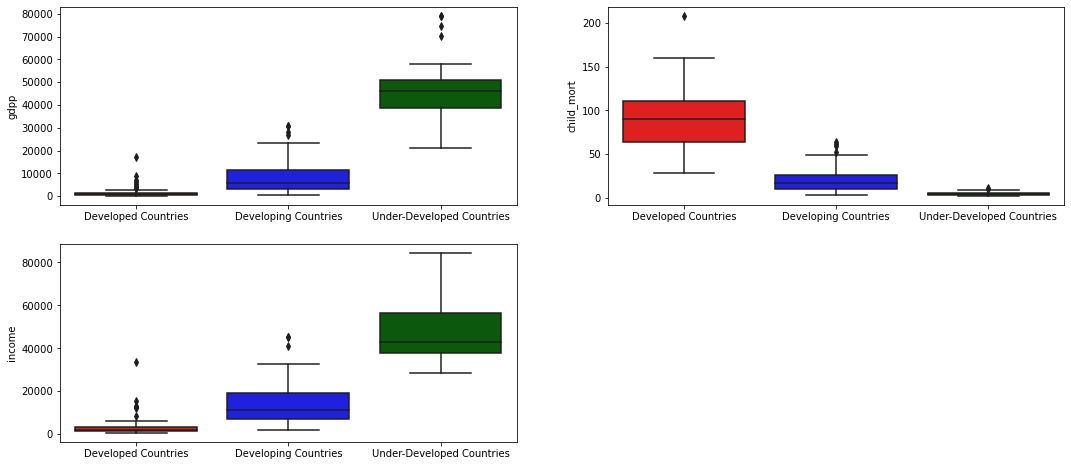

In [68]:
# Plot the cluster
plt.figure(figsize=(18,8))
i=0
for i in range(len(profiling_cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'k_means_cluster_label', y = profiling_cols[i], data = country_df_kmean, palette=['red','blue','darkgreen'])
    plt.xlabel('')

### INFERENCES:

The similar observation that we got from scatter plots can be seen in boxplots too. The clusters are grouped as
- Developing countries have Medium GDPP, medium Income and mild child mortality rate.
- Developed countries have High GDPP, High income and very low child mortality rate.
- Under-Developed countries have Low GDPP, Low income and very high mortality rate and should be our primary focus.

We can see that GDPP and income of the under-developed countries are so low that they are not seen properly in the same scale that of the developed countries.

<Figure size 1296x576 with 0 Axes>

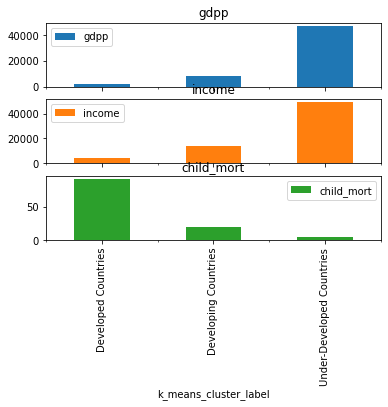

In [69]:
# Profiling GDP, INCOME AND CHID_MORT in sub-plots
plt.figure(figsize=(18,8))
grouped_df = country_df_kmean[['gdpp', 'income', 'child_mort','k_means_cluster_label']].groupby('k_means_cluster_label').mean()
axes = grouped_df.plot.bar(subplots=True)
plt.show()

### INFERENCES:

We can see the mean of the gdpp and income of the under-developed countries are so low when compared to developing or developed countries and we need to look further into this cluster to get the countries which are in most need of aid.

<AxesSubplot:xlabel='k_means_cluster_label'>

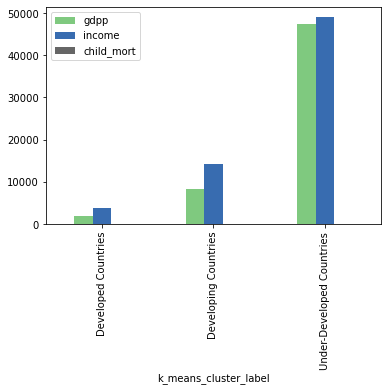

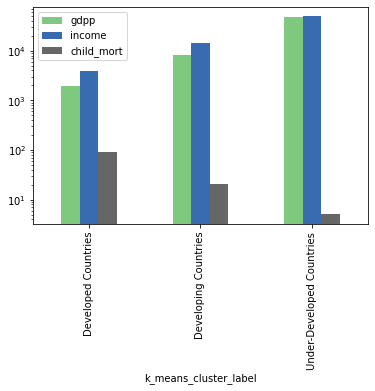

In [70]:
# Profiling GDP, INCOME AND CHID_MORT together from the above grouped_df
grouped_df.plot(kind='bar', colormap='Accent')
grouped_df.plot(kind='bar',logy=True, colormap='Accent')

### INFERENCES:

The mean of each cluster show the similar observation and the grouping is done perfectly such that we can focus on cluster **Under-Developed Countries** as it has **Low GDPP, Low income and very high mortality rate.**

## 4.7 Identification of Top 10 countries that require aid on priority using K-means algorithm:

In [112]:
K_top10 = country_df_kmean[country_df_kmean['k_means_cluster_label'] =='Under-Developed Countries'].sort_values(['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(15)
K_top10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster_label
98,Malta,6.8,32283.00,1825.15,32494.00,28300.0,3.830,80.3,1.36,21100.0,Under-Developed Countries
42,Cyprus,3.6,15461.60,1838.76,17710.00,33900.0,2.010,79.9,1.42,30800.0,Under-Developed Countries
111,New Zealand,6.2,10211.10,3403.70,9436.00,32300.0,3.730,80.9,2.17,33700.0,Under-Developed Countries
157,United Arab Emirates,8.6,27195.00,1281.00,22260.00,57600.0,12.500,76.5,1.87,35000.0,Under-Developed Countries
23,Brunei,10.5,23792.20,1002.52,9884.00,80600.0,16.700,77.1,1.84,35300.0,Under-Developed Countries
75,Italy,4.0,9021.60,3411.74,9737.60,36200.0,0.319,81.7,1.46,35800.0,Under-Developed Countries
82,Kuwait,10.8,25679.50,1012.55,11704.00,75200.0,11.200,78.2,2.21,38500.0,Under-Developed Countries
158,United Kingdom,5.2,10969.80,3749.96,11981.20,36200.0,1.570,80.3,1.92,38900.0,Under-Developed Countries
54,France,4.2,10880.80,4831.40,11408.60,36900.0,1.050,81.4,2.03,40600.0,Under-Developed Countries
58,Germany,4.2,17681.40,4848.80,15507.80,40400.0,0.758,80.1,1.39,41800.0,Under-Developed Countries


In [114]:
print(K_top10.country)

98                    Malta
42                   Cyprus
111             New Zealand
157    United Arab Emirates
23                   Brunei
75                    Italy
82                   Kuwait
158          United Kingdom
54                   France
58                  Germany
68                  Iceland
15                  Belgium
77                    Japan
53                  Finland
133               Singapore
Name: country, dtype: object


These are the countries that require aid, identified by K-means algorithm. Lets use another technique called `Hierarchical clustering` and see if any other country requires aid much more than these countries and present our final analysis

# 5 Build unsupervised model using Hierarchical Clustering


- We have built an unsupervised model using K-means algorithm. Now lets create a model to cluster the countries using `Hierarchical Clustering`. 
- Hierarchical clustering starts by treating each observation as a separate cluster. 
- Then, it repeatedly executes the following two steps: 
  1. identify the two clusters that are closest together
  2. merge the two most similar clusters. 
  
This iterative process continues until all the clusters are merged together. The main output of Hierarchical Clustering is a `dendrogram`, which shows the hierarchical relationship between the clusters

### Linkage Criteria

- There are multiple linkage criteria which determines from where `Euclidean distance` is computed. 
- It can be computed between 
  - The two most similar parts of a cluster in a **single-linkage**
  - The two least similar bits of a cluster in a **complete-linkage
  - The center of the clusters in a mean or average-linkage
  
We will do both single and complete linkages here and try to interpret their dendograms.

## 5.1 Single linkage

In [73]:
country_df_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.543736,-0.032042
...,...,...,...,...,...,...,...,...,...
162,-0.225578,-0.452874,-0.503105,-0.458563,-0.776821,-0.489784,-0.852161,0.373359,-0.563175
163,-0.526514,-0.236420,-0.219189,-0.372256,-0.019971,3.616865,0.546361,-0.316136,0.042765
164,-0.372315,-0.491607,-0.540250,-0.513337,-0.690802,0.409732,0.286958,-0.664231,-0.658699
165,0.448417,-0.539950,-0.552429,-0.577202,-0.691361,1.500916,-0.344633,1.156572,-0.658699


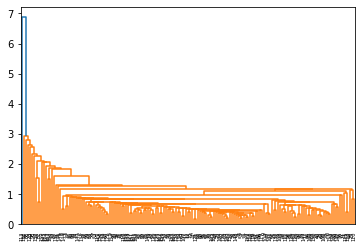

In [74]:
# single linkage
mergings = linkage(country_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

### INTERPRETATION OF DENDOGRAM:

Single linkage's dendogram is not readable or interpretable. Hence we cannot use this for our problem.

Lets try with complete linkage and see if it helps

## 5.2 Complete Linkage:

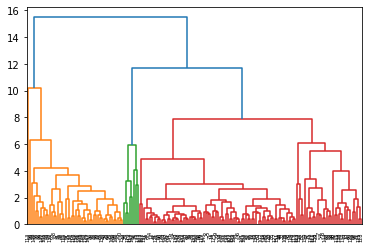

In [75]:
# complete linkage
mergings = linkage(country_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### INTERPRETATION OF DENDOGRAM:

Complete linkage's dendogram is readable and better to interpret when compared to single linkage's dendogram.

We can see merging of clusters represented in different colors.

If we cut the dendogram tree at SCORE 5 or 6, we have 4 clusters. But we can see the dissimilarity between 4 clusters and 3 clusters is not much as at score 8 itself, we see 3 clusters forming. Only at higher score of 12, 2 sets of clusters available. 

This indicates 3 clusters is a good choice as there will be good dissimilarity between clusters and good similarity within clusters.

In [76]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [77]:
# assign cluster labels
country_df['cluster_labels'] = cluster_labels
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


## 5.3 Initial Cluster Profiling Using Hierarchical Clustering Model

In [78]:
country_df.cluster_labels.value_counts()

1    111
0     48
2      8
Name: cluster_labels, dtype: int64

We can see here that though the number of clusters are same as K-means algorithm i.e.3, number of countries in each cluster vary. Lets profile the clusters and label these 

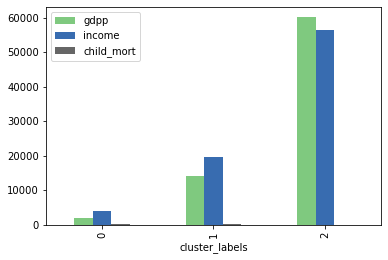

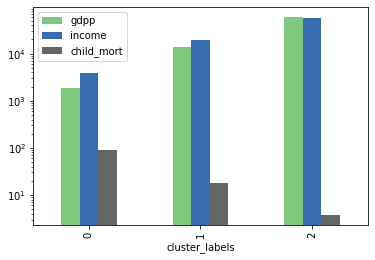

In [79]:
# Profiling GDP, INCOME AND CHID_MORT in separete plots
grouped_df = country_df[['gdpp', 'income', 'child_mort','cluster_labels']].groupby('cluster_labels').mean()
grouped_df.plot(kind='bar', colormap='Accent')    
grouped_df.plot(kind='bar',logy=True, colormap='Accent')    
plt.show()

<AxesSubplot:xlabel='cluster_labels'>

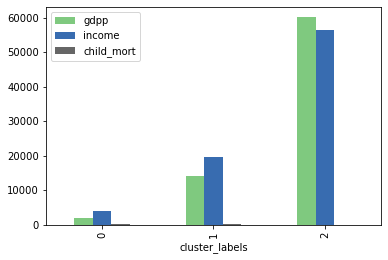

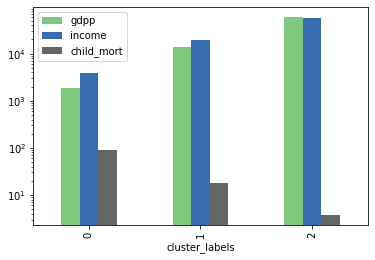

In [80]:
# Profiling GDP, INCOME AND CHID_MORT together
grouped_df.plot(kind='bar', colormap='Accent')
grouped_df.plot(kind='bar',logy=True, colormap='Accent')

From the above plots, its evident that the cluster labels 
- 0 : Under-developed countries having low GDPP, low income and high child mortality rate.
- 1 : Developing countries having medium GDPP, medium income and mild child mortality rate.
- 2 : Developed countries having high GDPP, high income and very low child mortality rate.

## 5.4 Countries Segmentation

Similar to our approach in K-mean algorithm, We can rename the labels for better business understanding as cluster label 0, 1 and 2 does not make sense to interpret. Then we will perform the cluster profiling with new labels.

Lets rename the cluster labels as 
- 0 : Under-developed Countries
- 1 : Developing Countries
- 2 : Developed Countries
    
This would help the NGO to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries and focus on **Cluster 2: Under-developed Countries**

In [81]:
# Low income, Low GDP and High Child_mort
# Filter the data for that clsuter

country_df.loc[country_df['cluster_labels'] == 0,'cluster_labels'] ='Under-Developed Countries'
country_df[country_df['cluster_labels'] == 'Under-Developed Countries']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.8200,553.0,Under-Developed Countries
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.1600,3530.0,Under-Developed Countries
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.3600,758.0,Under-Developed Countries
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.8800,6350.0,Under-Developed Countries
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.8700,575.0,Under-Developed Countries
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.2600,231.0,Under-Developed Countries
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.1100,1310.0,Under-Developed Countries
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.2100,446.0,Under-Developed Countries
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.5636,897.0,Under-Developed Countries
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.7500,769.0,Under-Developed Countries


In [82]:
country_df[country_df['cluster_labels'] == 'Under-Developed Countries'].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.972233,1909.208333
std,34.319855,2252.474004,165.518331,1540.981910,5590.168621,15.362485,6.384914,0.995640,2925.911009
min,28.100000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,2.590000,231.000000
25%,63.675000,102.873750,34.005875,193.319500,1390.000000,4.080000,56.725000,4.475000,551.500000
50%,89.750000,196.260000,51.613500,339.306000,1860.000000,8.855000,59.800000,5.055000,932.000000
75%,111.000000,552.522500,95.303250,801.000000,3522.500000,16.600000,62.825000,5.597500,1465.000000
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.100000,6.563600,17100.000000


In [83]:
# Medium income, Medium GDP and Mild Child_mort
# Filter the data for that clsuter

country_df.loc[country_df['cluster_labels'] == 1,'cluster_labels'] ='Developing Countries'
country_df[country_df['cluster_labels'] == 'Developing Countries']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.49,76.3,1.65,4090.0,Developing Countries
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.10,76.5,2.89,4460.0,Developing Countries
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.44,76.8,2.13,12200.0,Developing Countries
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.90,75.8,2.37,10300.0,Developing Countries
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.77,73.3,1.69,3220.0,Developing Countries
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,3129.70,993.650,3022.60,17100.0,4.91,76.4,2.08,11900.0,Developing Countries
161,Uzbekistan,36.3,437.46,80.178,393.30,4240.0,16.50,68.8,2.34,1380.0,Developing Countries
162,Vanuatu,29.2,1384.02,155.925,1565.19,2950.0,2.62,63.0,3.50,2970.0,Developing Countries
163,Venezuela,17.1,3847.50,662.850,2376.00,16500.0,45.90,75.4,2.47,13500.0,Developing Countries


In [84]:
country_df[country_df['cluster_labels'] == 'Developing Countries'].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,17.686486,6197.379266,1098.913521,5702.860550,19617.693694,6.443802,74.698198,2.151982,14035.783784
std,13.991286,7689.510140,1507.213347,5929.947700,16238.417922,7.432669,4.557331,0.650693,14979.218204
min,2.600000,1.076920,19.463600,0.651092,1990.000000,-4.210000,63.000000,1.230000,592.000000
25%,6.850000,1198.840000,195.479500,1513.755000,7850.000000,1.420000,71.450000,1.580000,3380.000000
50%,14.500000,3124.400000,469.908000,3022.600000,15300.000000,4.220000,74.700000,2.070000,8000.000000
75%,23.700000,9297.200000,1038.195000,8336.650000,28300.000000,8.870000,77.900000,2.600000,19550.000000
max,64.400000,43796.900000,8410.330400,32494.000000,84374.000000,45.900000,82.800000,4.340000,70300.000000


In [85]:
# High income, High GDP and Low Child_mort
# Filter the data for that clsuter

country_df.loc[country_df['cluster_labels'] == 2,'cluster_labels'] ='Developed Countries'
country_df[country_df['cluster_labels'] == 'Developed Countries']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
15,Belgium,4.5,33921.60,4750.8000,33166.80,41100.0,1.880,80.0,1.86,44400.0,Developed Countries
44,Denmark,4.1,29290.00,6612.0000,25288.00,44000.0,3.220,79.5,1.87,58000.0,Developed Countries
73,Ireland,4.2,50161.00,4475.5300,42125.50,45700.0,-3.220,80.4,2.05,48700.0,Developed Countries
91,Luxembourg,2.8,64794.26,8158.5000,55371.39,84374.0,3.620,81.3,1.63,79088.0,Developed Countries
110,Netherlands,4.5,36216.00,5985.7000,31990.80,45500.0,0.848,80.7,1.79,50300.0,Developed Countries
114,Norway,3.2,34856.60,8323.4400,25023.00,62300.0,5.950,81.0,1.95,79088.0,Developed Countries
133,Singapore,2.8,64794.26,1845.3600,55371.39,72100.0,-0.046,82.7,1.15,46600.0,Developed Countries
145,Switzerland,4.5,47744.00,8410.3304,39761.80,55500.0,0.317,82.2,1.52,74600.0,Developed Countries


In [86]:
country_df[country_df['cluster_labels'] == 'Developed Countries'].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,3.825000,45222.215000,6070.207550,38512.335000,56321.750000,1.571125,80.975000,1.727500,60097.000000
std,0.762983,13974.354802,2309.856117,12017.974355,15518.448429,2.773660,1.076701,0.288184,15073.572977
min,2.800000,29290.000000,1845.360000,25023.000000,41100.000000,-3.220000,79.500000,1.150000,44400.000000
25%,3.100000,34622.850000,4681.982500,30315.100000,45125.000000,0.226250,80.300000,1.602500,48175.000000
50%,4.150000,41980.000000,6298.850000,36464.300000,50600.000000,1.364000,80.850000,1.825000,54150.000000
75%,4.500000,53819.315000,8199.735000,45436.972500,64750.000000,3.320000,81.525000,1.890000,75722.000000
max,4.500000,64794.260000,8410.330400,55371.390000,84374.000000,5.950000,82.700000,2.050000,79088.000000


Clustering is done well in this case as well as can be seen from summary statistics of each cluster.

## 5.5 Final Cluster Profiling with new labels

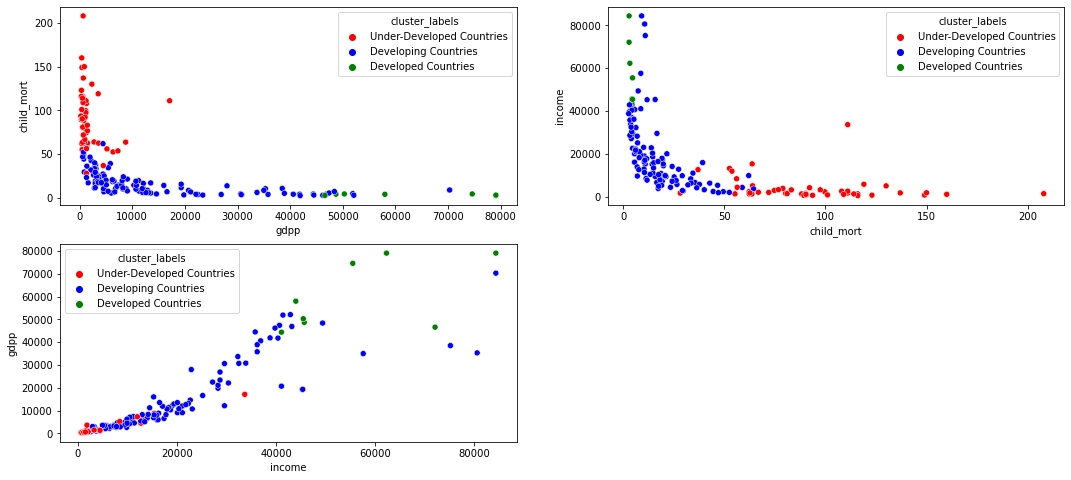

In [87]:
# Plot the cluster
plt.figure(figsize=(18,8))
i=0
for i in range(len(profiling_cols)):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x = profiling_cols[i], y = profiling_cols[(i+1)%len(profiling_cols)], hue = 'cluster_labels', data = country_df, palette=['red','blue','green'])

### INFERENCES:

These new labels help us to interpret the plots in a better fashion. We can see that 
- Developing countries have Medium GDPP, medium Income and mild child mortality rate.
- Developed countries have High GDPP, High income and very low child mortality rate.
- Under-Developed countries have Low GDPP, Low income and very high mortality rate and should be our primary focus.

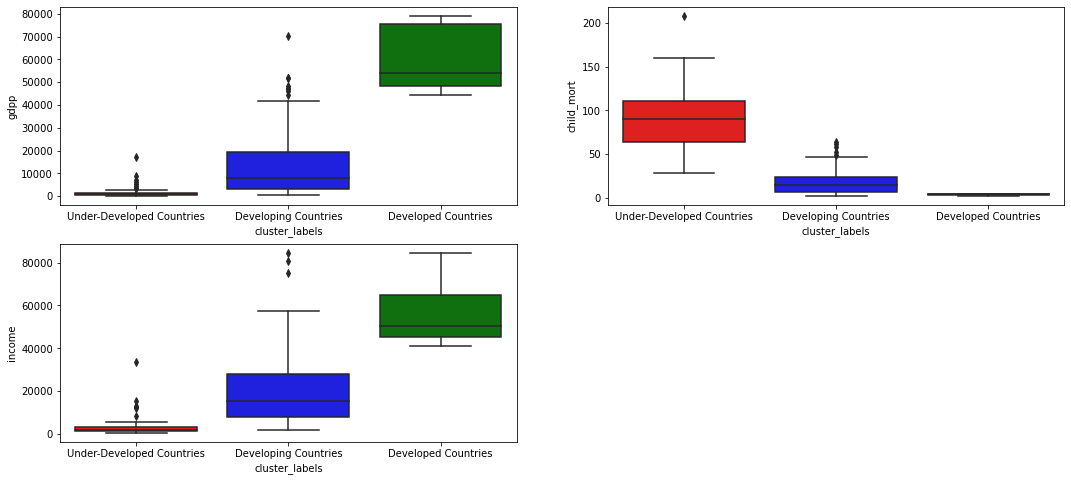

In [88]:
# Plot the cluster
plt.figure(figsize=(18,8))
i=0
for i in range(len(profiling_cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'cluster_labels', y = profiling_cols[i], data = country_df, palette=['red','blue','green'])

### INFERENCES:

The similar observation that we got from scatter plots can be seen in boxplots too. The clusters are grouped as
- Developing countries have Medium GDPP, medium Income and mild child mortality rate.
- Developed countries have High GDPP, High income and very low child mortality rate.
- Under-Developed countries have Low GDPP, Low income and very high mortality rate and should be our primary focus.

We can see that GDPP and income of the under-developed countries are so low that they are not seen properly in the same scale that of the developed countries.

These plots are similar to K-means algorithm plots and hence our analysis is good.

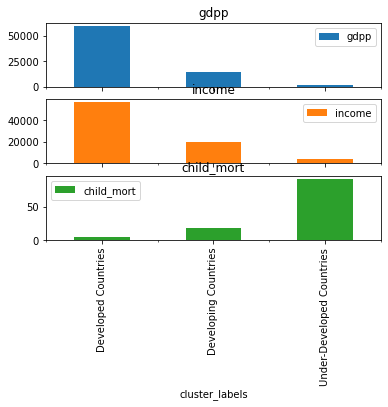

In [89]:
# Profiling GDP, INCOME AND CHID_MORT in sub-plots
grouped_df = country_df[['gdpp', 'income', 'child_mort','cluster_labels']].groupby('cluster_labels').mean()
grouped_df.plot(kind='bar', subplots=True)
plt.show()

<AxesSubplot:xlabel='cluster_labels'>

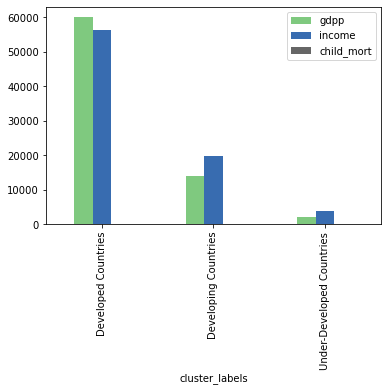

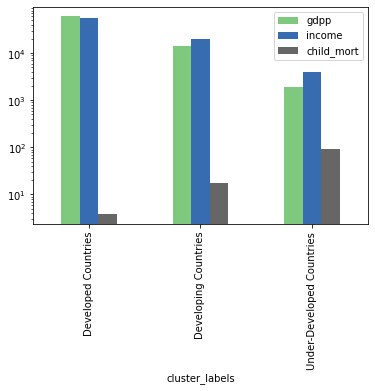

In [90]:
# Profiling GDP, INCOME AND CHID_MORT together
grouped_df.plot(kind='bar', colormap='Accent')
grouped_df.plot(kind='bar',logy=True, colormap='Accent')

### INFERENCES:

The average of each cluster show the similar observation and the grouping is done perfectly such that we can focus on cluster **Under-Developed Countries** as it has **Low GDPP, Low income and very high mortality rate.**

## 5.6 Identification of Top 10 countries that require aid on priority using Hierarchical clustering:

In [91]:
H_top10 = country_df[country_df['cluster_labels'] =='Under-Developed Countries'].sort_values(by = ['gdpp','child_mort','income'], ascending = [True, False, True]).head(10)
H_top10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,Under-Developed Countries
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,Under-Developed Countries
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,Under-Developed Countries
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,Under-Developed Countries
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,Under-Developed Countries
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.6000,413.0,Under-Developed Countries
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.5600,419.0,Under-Developed Countries
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,Under-Developed Countries
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.3100,459.0,Under-Developed Countries
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.6100,482.0,Under-Developed Countries


In [92]:
H_top10.country

26                      Burundi
88                      Liberia
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
93                   Madagascar
106                  Mozambique
31     Central African Republic
94                       Malawi
50                      Eritrea
Name: country, dtype: object

In [93]:
list(K_top10.country)==list(H_top10.country)

False

This indicates both K-means and Hierarchical Clustering returned same list of 10 countries which are in need of aid. 

We can chose final suggestions based on K-means clustering as the similarity within a cluster and dissimilarity across clusters is good in this methodology as can be seen from the summary statistics after segmentation. Also in K-means clustering, we have got around 48 countries in under developed countries clusters and hence it looks like better clustering mechanism.

Lets break this into two lists as `top5 in priority 1 list` and `next set of 5 countries in priority 2 list`.

In [94]:
Priority_1_countries = K_top10.head(5)
Priority_1_countries['Aid Priority'] = "Aid Requirement Priority 1"
Priority_1_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster_label,Aid Priority
98,Malta,6.8,32283.0,1825.15,32494.0,28300.0,3.83,80.3,1.36,21100.0,Under-Developed Countries,Aid Requirement Priority 1
42,Cyprus,3.6,15461.6,1838.76,17710.0,33900.0,2.01,79.9,1.42,30800.0,Under-Developed Countries,Aid Requirement Priority 1
111,New Zealand,6.2,10211.1,3403.70,9436.0,32300.0,3.73,80.9,2.17,33700.0,Under-Developed Countries,Aid Requirement Priority 1
157,United Arab Emirates,8.6,27195.0,1281.00,22260.0,57600.0,12.50,76.5,1.87,35000.0,Under-Developed Countries,Aid Requirement Priority 1
23,Brunei,10.5,23792.2,1002.52,9884.0,80600.0,16.70,77.1,1.84,35300.0,Under-Developed Countries,Aid Requirement Priority 1


In [95]:
Priority_2_countries = K_top10.tail(5)
Priority_2_countries['Aid Priority'] = "Aid Requirement Priority 2"
Priority_2_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster_label,Aid Priority
75,Italy,4.0,9021.6,3411.74,9737.6,36200.0,0.319,81.7,1.46,35800.0,Under-Developed Countries,Aid Requirement Priority 2
82,Kuwait,10.8,25679.5,1012.55,11704.0,75200.0,11.200,78.2,2.21,38500.0,Under-Developed Countries,Aid Requirement Priority 2
158,United Kingdom,5.2,10969.8,3749.96,11981.2,36200.0,1.570,80.3,1.92,38900.0,Under-Developed Countries,Aid Requirement Priority 2
54,France,4.2,10880.8,4831.40,11408.6,36900.0,1.050,81.4,2.03,40600.0,Under-Developed Countries,Aid Requirement Priority 2
58,Germany,4.2,17681.4,4848.80,15507.8,40400.0,0.758,80.1,1.39,41800.0,Under-Developed Countries,Aid Requirement Priority 2


# 6. Presenting countries that are in need of help to HELP International
   

In [96]:
def results_plots(df_name):
    plt.figure(figsize=[18,6])
    for i,column_name in enumerate(profiling_cols):
        plt.subplot(2,2,i+1)
        ax = sns.barplot(x='country', y=column_name, data= df_name)
        for each_bar in ax.patches:
            ax.annotate(str(each_bar.get_height()), (each_bar.get_x() * 1.01 , each_bar.get_height() * 1.01))
        plt.ylabel(column_name)
        plt.xlabel('Countries which have poor %s' %column_name)

First set of countries that require aid immediately: 

In [97]:
Priority_1_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster_label,Aid Priority
98,Malta,6.8,32283.0,1825.15,32494.0,28300.0,3.83,80.3,1.36,21100.0,Under-Developed Countries,Aid Requirement Priority 1
42,Cyprus,3.6,15461.6,1838.76,17710.0,33900.0,2.01,79.9,1.42,30800.0,Under-Developed Countries,Aid Requirement Priority 1
111,New Zealand,6.2,10211.1,3403.70,9436.0,32300.0,3.73,80.9,2.17,33700.0,Under-Developed Countries,Aid Requirement Priority 1
157,United Arab Emirates,8.6,27195.0,1281.00,22260.0,57600.0,12.50,76.5,1.87,35000.0,Under-Developed Countries,Aid Requirement Priority 1
23,Brunei,10.5,23792.2,1002.52,9884.0,80600.0,16.70,77.1,1.84,35300.0,Under-Developed Countries,Aid Requirement Priority 1


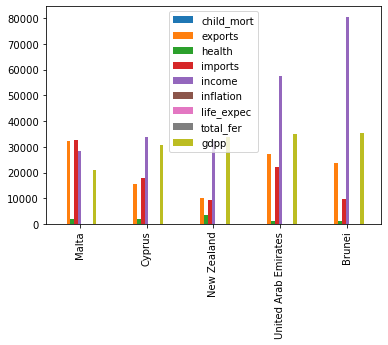

In [98]:
Priority_1_countries.set_index('country').plot(kind='bar')
plt.xlabel('')
plt.show()

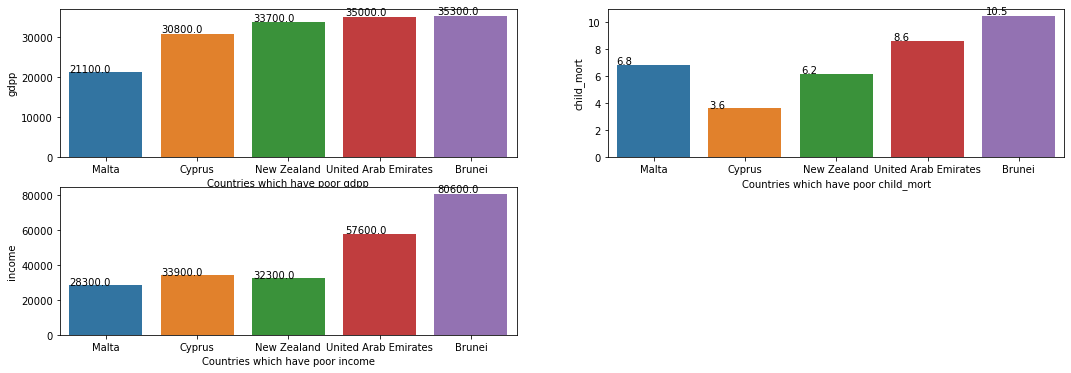

In [99]:
results_plots(Priority_1_countries)

Once the above countries are helped with, the following set could be provided aid as next set of countries:

In [100]:
Priority_2_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_cluster_label,Aid Priority
75,Italy,4.0,9021.6,3411.74,9737.6,36200.0,0.319,81.7,1.46,35800.0,Under-Developed Countries,Aid Requirement Priority 2
82,Kuwait,10.8,25679.5,1012.55,11704.0,75200.0,11.200,78.2,2.21,38500.0,Under-Developed Countries,Aid Requirement Priority 2
158,United Kingdom,5.2,10969.8,3749.96,11981.2,36200.0,1.570,80.3,1.92,38900.0,Under-Developed Countries,Aid Requirement Priority 2
54,France,4.2,10880.8,4831.40,11408.6,36900.0,1.050,81.4,2.03,40600.0,Under-Developed Countries,Aid Requirement Priority 2
58,Germany,4.2,17681.4,4848.80,15507.8,40400.0,0.758,80.1,1.39,41800.0,Under-Developed Countries,Aid Requirement Priority 2


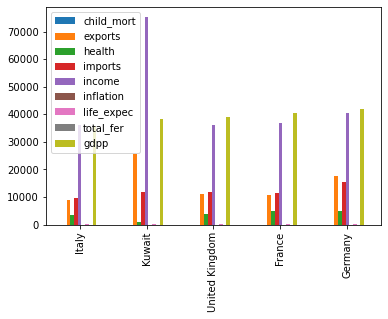

In [101]:
Priority_2_countries.set_index('country').plot(kind='bar')
plt.xlabel('')
plt.show()

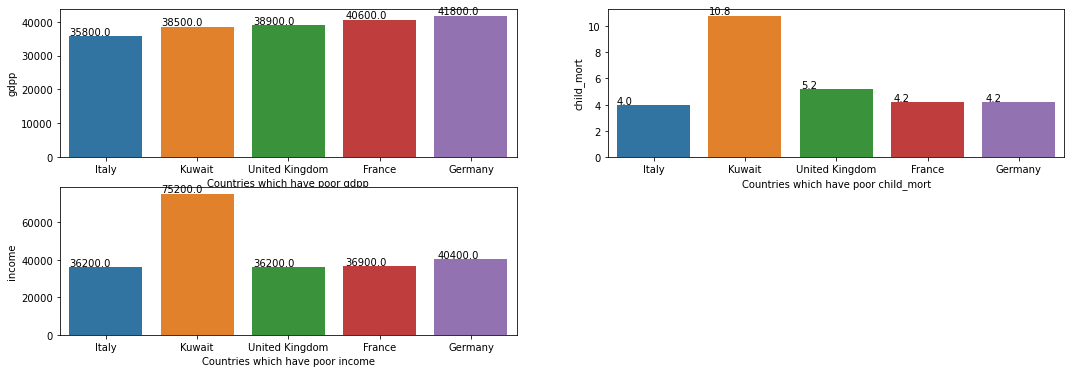

In [102]:
results_plots(Priority_2_countries)

# Suggestions to HELP International - Countries that are in need of aid:
The following 5 are the countries which have to be provided aid first:

1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone

Once the above countries are provided with Aid, the following are the next set of countries which would require aid in order to reduce the child mortality rate and improve their GDPP and income per person:

6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea